In [1]:
import pandas as pd
import gzip
import json
import numpy as np
import seaborn as sns
import time

In [2]:
# start time for entire notebook
start_all = time.time()

In [3]:
import random
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

In [4]:
pip install surprise

# **Reading the data set:**

In [5]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

grocery_data = getDF('/content/drive/MyDrive/Amazon Grocery and Gourmet Data 2018/Grocery_and_Gourmet_Food_5.json.gz')
grocery_metadata = getDF('/content/drive/MyDrive/Amazon Grocery and Gourmet Data 2018/meta_Grocery_and_Gourmet_Food.json.gz')

In [6]:
grocery_data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5.0,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN
2,5.0,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN
3,5.0,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN
4,5.0,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1143855,5.0,True,"09 8, 2017",A223YRQH2Z5T1D,B01HJF6FRA,flint5292,"As a new vegan, it is sometimes difficult to r...","As a new vegan, it is sometimes difficult to ...",1504828800,4,NaN,NaN
1143856,5.0,True,"08 4, 2017",A38GDA4TB9EILT,B01HJF6FRA,Moriah Bolyard,The best thing ever is ordering a product you ...,The best thing ever is ordering a product you ...,1501804800,3,NaN,NaN
1143857,5.0,True,"07 4, 2017",A2025PN7HDC5BO,B01HJF6FRA,M.C,I used to love ranch before I became vegan. It...,Just what the vegan ordered!,1499126400,5,NaN,NaN
1143858,5.0,True,"06 7, 2017",A1NY7XWC7EPQOA,B01HJF6FRA,Greensboro,I cannot have dairy nor gluten. This is as cl...,This is as close to Ranch as I will ever be ab...,1496793600,2,NaN,NaN


In [7]:
grocery_metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,[],[],NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,[Jazz up your cakes with a sparkling monogram ...,,Letter C - Swarovski Crystal Monogram Wedding ...,[],,Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,,"September 21, 2010",$29.95,1888861118,[],[],NaN
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter H - Swarovski Crystal Monogram Wedding ...,[],,Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$11.45,1888861517,[],[],NaN
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[4.75""]",,Letter S - Swarovski Crystal Monogram Wedding ...,[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00,1888861614,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287046,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",,[Caffarel fruit jellies are a product of Italy...,,"Caffarel Fruit Jellies, Organic Assorted, 200 ...","[B01HULC3TC, B07C8L4NWL, B014UTG6D6, B01M3UOLAP]",,Caffarel,[],"369,384 in Grocery & Gourmet Food (",[],Grocery,,,,B01HJFBN9A,[],[],{' Product Dimensions: ': '11.8 x 4.7...
287047,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Hampton Creeks Just Mayo Truffle makes fancy ...,,"HAMPTON CREEK Spo Just Truffle Mayo, 12 Ounce","[B00WNAEX2Q, B071LD7PMJ, B01HJF6FRA, B072HG8GF...",,Hampton Creek,[],"113,710 in Grocery & Gourmet Food (",[],Grocery,,,$10.89,B01HJFC704,[],[],"{'Shipping Weight:': '12 ounces (', 'Domestic ..."
287048,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Nothing compares with the classically zesty f...,,"HAMPTON CREEK Just Ranch Dressing, 12 Fluid Ounce","[B071LD7PMJ, B00KOHNX6C, B00OVN2F64, B01HJEHE9...",,Hampton Creek,[],"21,731 in Grocery & Gourmet Food (",[],Grocery,,,$10.95,B01HJF6FRA,[],[],"{'Shipping Weight:': '10.4 ounces (', 'Domesti..."
287049,"[Grocery & Gourmet Food, Herbs, Spices & Seaso...",,[],,Gourmet Pure Vanilla Bean Pastes - Organically...,"[B00DUF219A, B01HJHX9ZO, B07K4K26PQ, B000H7ENQ...",,Heilala Vanilla,[],472 in Grocery & Gourmet Food (,[],Grocery,,,$14.97,B01HJHSVG6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '5.6 ounces (', 'ASIN: ':..."


Distribution of ratings in the grocery_data:

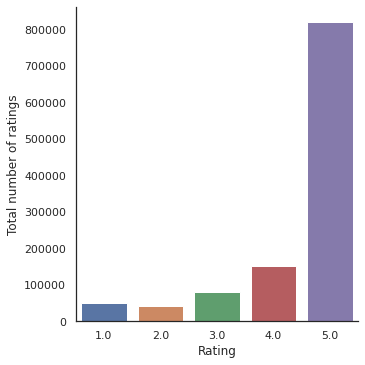

In [8]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="overall", data=grocery_data,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

Extracting the year information from the column 'reviewTime':

In [9]:
# CREATING A YEAR COLUMN

def year_extractor(reviewTime):
  year = reviewTime[-4:]
  return year


grocery_data['Year'] = grocery_data['reviewTime'].apply(year_extractor)

The counts of various Years in the data. The data set is from 1998 to 2018. 

In [10]:
grocery_data['Year'].value_counts()

2016    253463
2015    246606
2017    203536
2014    166589
2018     98253
2013     90580
2012     34471
2011     19894
2010     11592
2009      9261
2008      5645
2007      2988
2006       871
2005        81
2004        23
2003         4
2002         2
2000         1
Name: Year, dtype: int64

In [11]:
from collections import Counter
time_info_all = grocery_data['reviewTime']
month_info_all = []
month_dict_all = {"01":"January",
              "02": "February",
              "03": "March",
              "04": "April",
              "05": "May",
              "06": "June",
              "07": "July",
              "08": "August",
              "09": "September",
              "10": "October",
              "11": "November",
              "12": "December"}
for x in time_info_all:
  month_all = x[:2]
  month_word_all = month_dict_all[month_all]
  month_info_all.append(month_word_all)


year_info_all = []

for x in time_info_all:
  year_all = x[-4:]
  year_info_all.append(year_all)


frequency_month_all = Counter(month_info_all)
month_df_all = pd.DataFrame({"Jan": frequency_month_all['January'], "Feb":frequency_month_all['February'],
                         "Mar":frequency_month_all['March'],"Apr":frequency_month_all['April'],"May":frequency_month_all['May'],
                         "Jun":frequency_month_all['June'],"Jul":frequency_month_all['July'],"Aug":frequency_month_all['August'],
                         "Sep":frequency_month_all['September'],"Oct":frequency_month_all['September'],"Nov":frequency_month_all['November'],
                         "Dec":frequency_month_all['December']},index=[0])


In [12]:
frequency_year_all = Counter(year_info_all)
year_df_all = pd.DataFrame({'1998':frequency_year_all['1998'],'1999':frequency_year_all['1999'],
                        '2000':frequency_year_all['2000'], '2001':frequency_year_all['2001'], '2002':frequency_year_all['2002'],
                        '2003':frequency_year_all['2003'], '2004':frequency_year_all['2004'], '2005':frequency_year_all['2005'],
                        '2006':frequency_year_all['2006'], '2007':frequency_year_all['2007'], '2008':frequency_year_all['2008'],
                        '2009':frequency_year_all['2009'], '2010':frequency_year_all['2010'], '2011':frequency_year_all['2011'],
                        '2012':frequency_year_all['2012'], '2013':frequency_year_all['2013'], '2014':frequency_year_all['2014'],
                        '2015':frequency_year_all['2015'], '2016':frequency_year_all['2016'], '2017':frequency_year_all['2017'],
                        '2018':frequency_year_all['2018']}, index=[0])

Month-wise distribution of ratings in grocery_data:

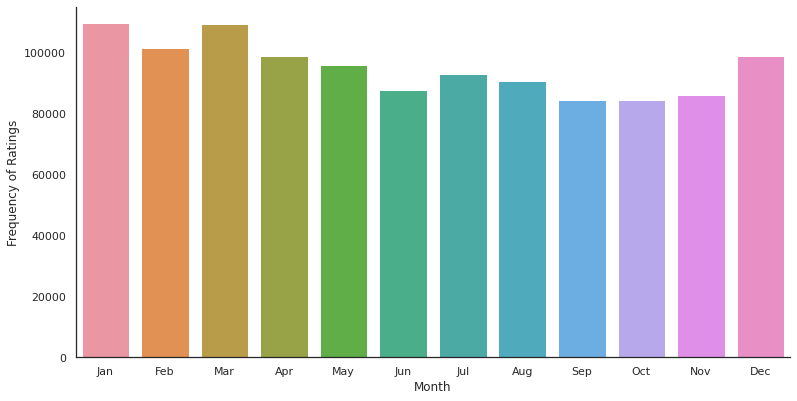

In [13]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=month_df_all,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Month")
    

Year-wise distribution of ratings in grocery_data:

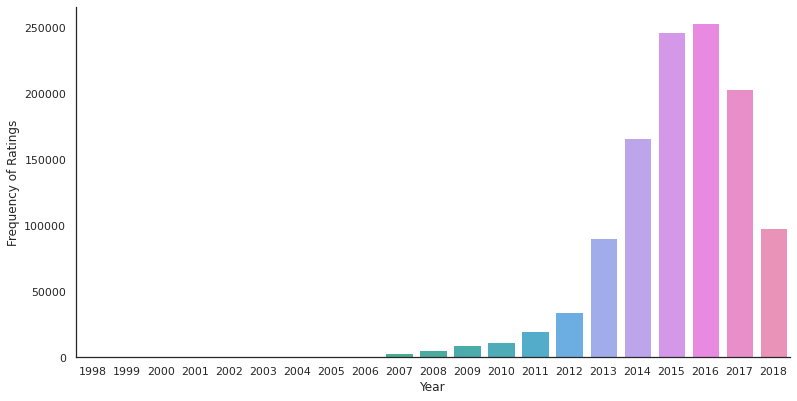

In [14]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=year_df_all,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Year")
    

We drop the data from the years 1998 to 2012, and focus our work only on the years 2013-18.

In [15]:
# Dropping data relevant to years 1998 to 2012.

grocery_data.drop(grocery_data[grocery_data['Year']=='1998'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='1999'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2000'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2001'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2002'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2003'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2004'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2005'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2006'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2007'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2008'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2009'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2010'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2011'].index, inplace=True)
grocery_data.drop(grocery_data[grocery_data['Year']=='2012'].index, inplace=True)


The counts of the five years i.e. 2013, 2014, 2015, 2016, 2017, 2018 are shown below.

In [16]:
grocery_data['Year'].value_counts()

2016    253463
2015    246606
2017    203536
2014    166589
2018     98253
2013     90580
Name: Year, dtype: int64

Considering each year as a strata, a stratified sample is taken, with 2% of data points taken from each of the 5 years.

In [17]:
# TAKING STRATIFIED SAMPLE BY TREATING EACH YEAR AS A GROUP

# stratified split dataset by column
from sklearn.model_selection import train_test_split
grocery_data_stratified = train_test_split(grocery_data, train_size = 0.02, stratify=grocery_data['Year'], random_state = 42)

The stratified data frame is displayed below.

In [18]:
grocery_data_stratified = grocery_data_stratified[0]
grocery_data_stratified

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,Year
836196,5.0,True,"02 1, 2016",A1D655KMQW008Q,B00KQ1I90Q,damien,Awesome!,Five Stars,1454284800,NaN,NaN,NaN,2016
208887,1.0,True,"12 21, 2014",A1UZIG6AHDAHM4,B0013JQ1GO,M. Jang,Very disappointed with this product. I've purc...,Very disappointed with this product,1419120000,2,NaN,NaN,2014
912860,5.0,True,"11 4, 2017",A2C2KBRQJEQ55O,B00UAJ7XIS,Max1998,good,Five Stars,1509753600,NaN,{'Style:': ' Birthday'},NaN,2017
770324,4.0,True,"04 4, 2015",AHRKNAVOFIQG0,B00G6CLLLI,TruthMatters,You know what these are good for - putting int...,Great for deodorizing in addition to normal us...,1428105600,NaN,"{'Size:': ' 2 Ounce Bottle, 6 Count', 'Flavor:...",NaN,2015
684644,1.0,True,"06 7, 2017",A24YMHJB7OIWGN,B00CB4PKIA,JustMe,Very STRONG alcohol smell and taste. I've boug...,Nasty,1496793600,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306493,2.0,True,"10 27, 2014",A2M069CN0QEW5N,B001E6EE88,Starlette,most of the flakes were crumbled up into such ...,most of the flakes were crumbled up into such ...,1414368000,NaN,"{'Size:': ' 15 Ounce (Pack of 3)', 'Package Ty...",NaN,2014
27552,5.0,True,"06 19, 2016",A1I799AV7V4K79,B0007KNXAC,Utfam,Clean and exhalant quality.,Steel cut oats,1466294400,NaN,NaN,NaN,2016
1076861,5.0,True,"03 31, 2017",A1RY07IRU8PTEH,B005OJUSZE,K. Okimoto,I've tried most commercial kimchi types availa...,Home made kimchi is awesome!,1490918400,NaN,{'Style:': ' Hot Pepper Powder. 1.5 Lbs by Mi ...,NaN,2017
1021399,5.0,True,"10 2, 2017",A1IZELD1R6ZJ67,B0000EIEPW,Margaret,Meyer lemons are so good with their sweet flav...,Delish,1506902400,NaN,NaN,NaN,2017


The counts of the years in the stratified data set is displayed below.

In [19]:
grocery_data_stratified['Year'].value_counts()

2016    5069
2015    4932
2017    4071
2014    3332
2018    1965
2013    1811
Name: Year, dtype: int64

In [20]:
from collections import Counter
time_info = grocery_data_stratified['reviewTime']
month_info = []
month_dict = {"01":"January",
              "02": "February",
              "03": "March",
              "04": "April",
              "05": "May",
              "06": "June",
              "07": "July",
              "08": "August",
              "09": "September",
              "10": "October",
              "11": "November",
              "12": "December"}
for x in time_info:
  month = x[:2]
  month_word = month_dict[month]
  month_info.append(month_word)


year_info = []

for x in time_info:
  year = x[-4:]
  year_info.append(year)


frequency_month = Counter(month_info)
month_df = pd.DataFrame({"Jan": frequency_month['January'], "Feb":frequency_month['February'],
                         "Mar":frequency_month['March'],"Apr":frequency_month['April'],"May":frequency_month['May'],
                         "Jun":frequency_month['June'],"Jul":frequency_month['July'],"Aug":frequency_month['August'],
                         "Sep":frequency_month['September'],"Oct":frequency_month['September'],"Nov":frequency_month['November'],
                         "Dec":frequency_month['December']},index=[0])




In [21]:
frequency_year = Counter(year_info)
year_df = pd.DataFrame({ '2013':frequency_year['2013'], '2014':frequency_year['2014'],
                        '2015':frequency_year['2015'], '2016':frequency_year['2016'], '2017':frequency_year['2017'],
                        '2018':frequency_year['2018']}, index=[0])

Month-wise distribution of reviews in the entire stratified data set.

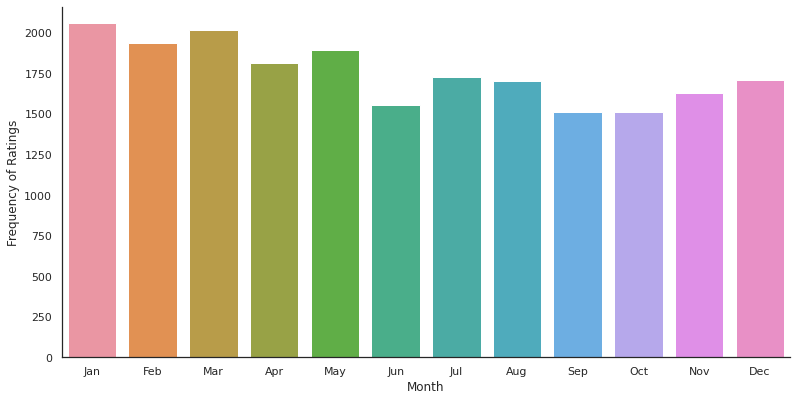

In [22]:

sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=month_df,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Month")
    

Year-wise distribution of reviews in the entire stratified data set.

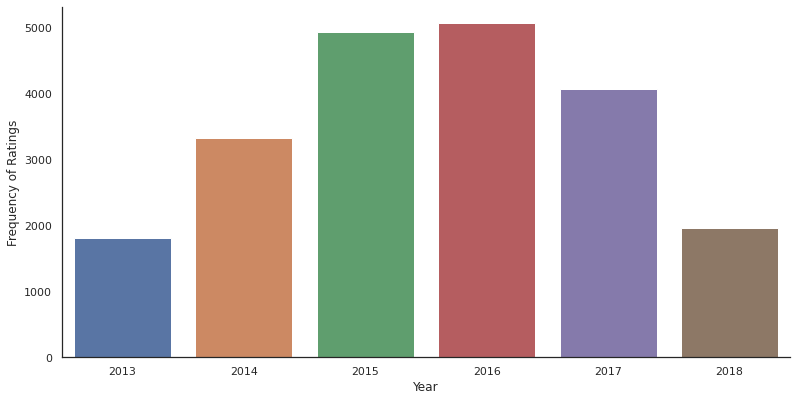

In [23]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(data=year_df,kind='bar',height = 5.5, aspect = 2)
    g.set_ylabels("Frequency of Ratings")
    g.set_xlabels("Year")
    


Checking number of missing values across various columns.

In [24]:
print('Number of missing values across columns: \n',grocery_data_stratified.isnull().sum())

Number of missing values across columns: 
 overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          3
reviewText            6
summary               6
unixReviewTime        0
vote              18658
style             10040
image             20994
Year                  0
dtype: int64


In [25]:
print('Number of missing values across columns: \n',grocery_metadata.isnull().sum())

Number of missing values across columns: 
 category            0
tech1               0
description         0
fit                 0
title               0
also_buy            0
tech2               0
brand               0
feature             0
rank                0
also_view           0
main_cat            0
similar_item        0
date                0
price               0
asin                0
imageURL            0
imageURLHighRes     0
details            24
dtype: int64


Distribution of ratings in the stratified sample data set.

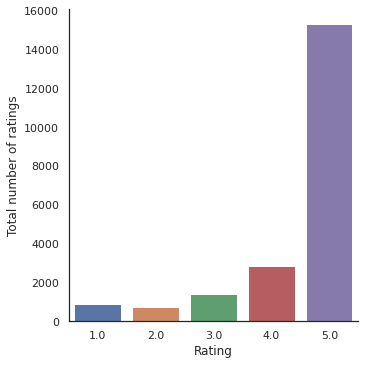

In [26]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="overall", data=grocery_data_stratified,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

In [27]:
#Replacing empty lists / blanks with NaN
grocery_metadata['title'] = grocery_metadata['title'].apply(lambda y: np.nan if len(y)==0 else y)
grocery_metadata['brand'] = grocery_metadata['brand'].apply(lambda y: np.nan if len(y)==0 else y)
grocery_metadata['category'] = grocery_metadata['category'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_grocery_metadata['rank'] = cleaned_grocery_metadata['rank'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_grocery_metadata['also_view'] = cleaned_grocery_metadata['also_view'].apply(lambda y: np.nan if len(y)==0 else y)
# cleaned_grocery_metadata['also_buy'] = cleaned_grocery_metadata['also_buy'].apply(lambda y: np.nan if len(y)==0 else y)
#cleaned_grocery_metadata['main_cat'] = cleaned_grocery_metadata['main_cat'].apply(lambda y: np.nan if len(y)==0 else y)
#cleaned_grocery_metadata['similar_item'] = cleaned_grocery_metadata['similar_item'].apply(lambda y: np.nan if len(y)==0 else y)
grocery_metadata['asin'] = grocery_metadata['asin'].apply(lambda y: np.nan if len(y)==0 else y)





In [28]:
print('Number of missing values across columns: \n',grocery_metadata.isnull().sum())

Number of missing values across columns: 
 category               0
tech1                  0
description            0
fit                    0
title                  3
also_buy               0
tech2                  0
brand              11419
feature                0
rank                   0
also_view              0
main_cat               0
similar_item           0
date                   0
price                  0
asin                   0
imageURL               0
imageURLHighRes        0
details               24
dtype: int64


In [29]:
grocery_metadata = grocery_metadata.rename(columns={"asin":"Item ID"})
grocery_data_stratified = grocery_data_stratified.rename(columns={"asin":"Item ID"})

In [30]:
len(grocery_data_stratified), len(grocery_metadata)

(21180, 287051)

Creating a combined data frame out of the metadata and the review data:

In [31]:
merged_data = pd.merge(grocery_data_stratified,grocery_metadata,on='Item ID')
# merged_data = merged_data.dropna()


In [32]:
# retaining the rows where category and brand is not missing

merged_data = merged_data[merged_data['category'].notna()]
merged_data = merged_data[merged_data['brand'].notna()]


In [33]:
print('Number of missing values across columns: \n',merged_data.isnull().sum())

Number of missing values across columns: 
 overall                0
verified               0
reviewTime             0
reviewerID             0
Item ID                0
reviewerName           3
reviewText             6
summary                6
unixReviewTime         0
vote               18869
style              10111
image              21245
Year                   0
category               0
tech1                  0
description            0
fit                    0
title                  0
also_buy               0
tech2                  0
brand                  0
feature                0
rank                   0
also_view              0
main_cat               0
similar_item           0
date                   0
price                  0
imageURL               0
imageURLHighRes        0
details                1
dtype: int64


In [34]:
merged_data

,overall,verified,reviewTime,reviewerID,Item ID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,Year,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5.0,True,"02 1, 2016",A1D655KMQW008Q,B00KQ1I90Q,damien,Awesome!,Five Stars,1454284800,NaN,NaN,NaN,2016,"[Grocery & Gourmet Food, Breakfast Foods, Cere...",,"[Quaker Puffed Rice, 6.4000-ounces , 2pk, Stat...",,"Quaker Puffed Rice, 6.3 oz (Pack of 2)",[],,Quaker,[],"186,735 in Grocery & Gourmet Food (","[B01M8NH9IW, B00WJCD0FO, B00PO9IGJ4, B01N3VQHQ...",Grocery,,,,[],[],"{'Shipping Weight:': '1.2 pounds', 'Domestic S..."
1,5.0,True,"10 12, 2015",A39M54748K1N2O,B00KQ1I90Q,Jim,Still good to the last bite.,Five Stars,1444608000,NaN,NaN,NaN,2015,"[Grocery & Gourmet Food, Breakfast Foods, Cere...",,"[Quaker Puffed Rice, 6.4000-ounces , 2pk, Stat...",,"Quaker Puffed Rice, 6.3 oz (Pack of 2)",[],,Quaker,[],"186,735 in Grocery & Gourmet Food (","[B01M8NH9IW, B00WJCD0FO, B00PO9IGJ4, B01N3VQHQ...",Grocery,,,,[],[],"{'Shipping Weight:': '1.2 pounds', 'Domestic S..."
2,1.0,True,"12 21, 2014",A1UZIG6AHDAHM4,B0013JQ1GO,M. Jang,Very disappointed with this product. I've purc...,Very disappointed with this product,1419120000,2,NaN,NaN,2014,"[Grocery & Gourmet Food, Dried Beans, Grains &...",,[Committed to producing the finest quality ric...,,Lundberg Family Farms Organic California Whit...,"[B000Z8ZN4U, B005765TD0, B0039KERAM, B004T2TF7...",,Lundberg,[],"32,953 in Grocery & Gourmet Food (","[B000Z8ZN4U, B01E6OKVY0, B00480GXY0, B0019LRH5...",Grocery,,,$74.66,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '3 x 3 x 6....
3,5.0,True,"11 4, 2017",A2C2KBRQJEQ55O,B00UAJ7XIS,Max1998,good,Five Stars,1509753600,NaN,{'Style:': ' Birthday'},NaN,2017,"[Grocery & Gourmet Food, Candy & Chocolate, Ch...",,[GODIVA's Happy Birthday Cake Truffle Flight i...,,Godiva Chocolatier Happy Birthday Cake Chocola...,"[B01MQNZ457, B01AMSZN2E, B00OPENQ80, B075V6L3H...",,GODIVA Chocolatier,[],"1,830 in Grocery & Gourmet Food (",[],Grocery,,,$17.00,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '10.9 x 7.9...
4,5.0,True,"08 7, 2018",A22AR3K1YW12EO,B00UAJ7XIS,Famousk1,I got this for my wife's birthday in the begin...,is amazing.,1533600000,NaN,{'Style:': ' Birthday'},NaN,2018,"[Grocery & Gourmet Food, Candy & Chocolate, Ch...",,[GODIVA's Happy Birthday Cake Truffle Flight i...,,Godiva Chocolatier Happy Birthday Cake Chocola...,"[B01MQNZ457, B01AMSZN2E, B00OPENQ80, B075V6L3H...",,GODIVA Chocolatier,[],"1,830 in Grocery & Gourmet Food (",[],Grocery,,,$17.00,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '10.9 x 7.9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,3.0,True,"09 12, 2013",A1EOYQQNPY2P5G,B0083COD6O,SMJ,Too expensive for what you get. Taste is fine...,ok,1378944000,NaN,NaN,NaN,2013,"[Grocery & Gourmet Food, Candy & Chocolate, Br...",,"[The first of their kind, Dream Blends drinks ...",,Dream Blends Unsweetened Enriched Original Alm...,[],,Dream Blends,[],"315,668 in Grocery & Gourmet Food (",[],Grocery,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '13.4 pounds', 'Domestic ..."
21586,5.0,True,"05 9, 2016",ARS1GMA6C6RT0,B00TLHDHGC,Anna,Love McDougall's products! This is a great so...,Love McDougall's products,1462752000,NaN,NaN,NaN,2016,"[Grocery & Gourmet Food, Soups, Stocks & Broth...",,[Clear noodles are popular in Asian cuisine be...,,Dr. McDougall's Right Foods Asian Soup Garlic ...,"[B0017U08SQ, B00TLHDCEE, B005FC75X8, B00S98CRY...",,Dr. McDougall's Right Foods,[],"311,496 in Grocery & Gourmet Food (",[],Gr

In [35]:
counts_of_users = merged_data['reviewerID'].value_counts()
counts_of_users

A2GJX2KCUSR0EI    16
A1LACH6MLQWZ      14
A8CGWGJ9OM58J     10
A2XKJ1KX6XUHYP     9
A3W5A9X3HHACQT     8
                  ..
A339PUNCSARI0H     1
APHMB81DGRZ8Z      1
A3VK5XG2S6DYCN     1
A6APIA4XI68RL      1
A1KHHCVZBTSBQB     1
Name: reviewerID, Length: 18550, dtype: int64

In [36]:
counts_of_users = dict(filter(lambda x: x[1] >= 5,counts_of_users.items()))

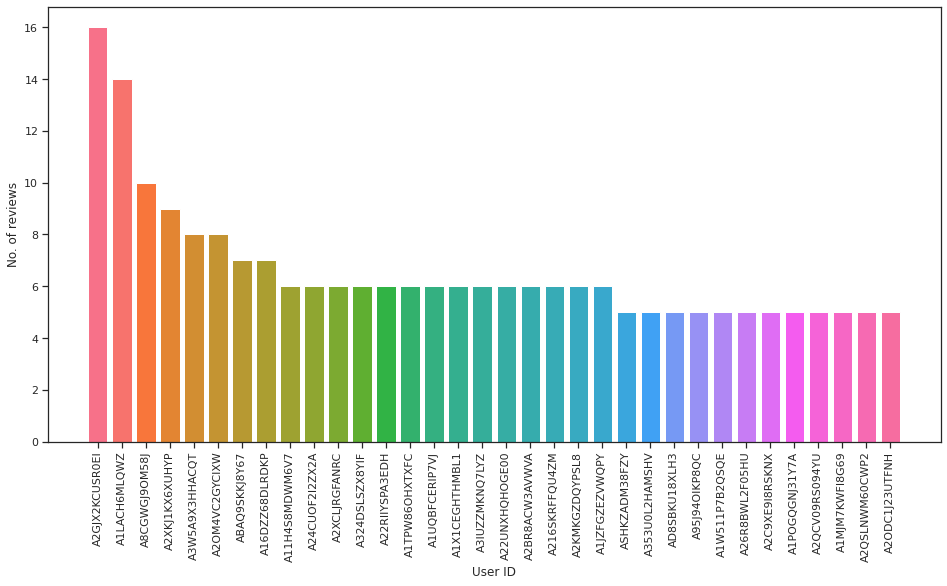

In [37]:
import matplotlib.pyplot as plt

ind = np.arange(len(counts_of_users))
palette = sns.color_palette("husl", len(counts_of_users))
plot = plt.figure(figsize=(16, 8))
plot = plt.bar(ind, list(counts_of_users.values()), color=palette)


plot = plt.xticks(ind, list(counts_of_users.keys()))
plot = plt.ylabel("No. of reviews")
plot = plt.xlabel("User ID")
plot = plt.xticks(rotation = 90)
plot = plt.show()



Trying to extract a list of all unique categories in the data set

In [38]:
cat_list = np.unique(merged_data['category'])
cat_list

array([list(['Grocery & Gourmet Food', 'Beverages']),
       list(['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes']),
       list(['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Cocktail Mixers']),
       list(['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Cocktail Mixers', 'Bitters']),
       list(['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Cocktail Mixers', 'Bloody Mary']),
       list(['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Cocktail Mixers', 'Margarita']),
       list(['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Cocktail Mixers', 'Martini']),
       list(['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Coconut Water']),
       list(['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Energy Drinks']),

In [39]:
mass_category_list = []
for c in cat_list:
  # each 'c' is a list of categories
  for i in c[1:2]: # since otherwise weird "categories" come in
    mass_category_list.append(i)

list_of_all_categories = np.unique(mass_category_list)

In [40]:
list_of_all_categories

array(['Beverages', 'Breads & Bakery', 'Breakfast Foods',
       'Candy & Chocolate', 'Canned, Jarred & Packaged Foods',
       'Condiments & Salad Dressings', 'Cooking & Baking',
       'Dairy, Cheese & Eggs', 'Deli', 'Dried Beans, Grains & Rice',
       'Food & Beverage Gifts', 'Fresh Flowers & Live Indoor Plants',
       'Frozen', 'Herbs, Spices & Seasonings',
       'Jams, Jellies & Sweet Spreads', 'Meat & Seafood',
       'Meat Substitutes', 'Olives, Pickles & Relishes',
       'Pasta & Noodles', 'Prepared Foods', 'Produce',
       'Sauces, Gravies & Marinades', 'Snack Foods',
       'Soups, Stocks & Broths'], dtype='<U34')

In [41]:
# replacing '&amp' and '&amp;' with '&'
proper_syntaxed_category_list = []
for cat in list_of_all_categories:
  if '&amp;' in cat.split():
    x = cat.replace('&amp;','&')
  elif '&amp' in cat.split():
    x = cat.replace('&amp','&')
  else:
    x = cat

  proper_syntaxed_category_list.append(x)

In [42]:
list_of_all_categories = np.unique(proper_syntaxed_category_list)

LIST OF ALL CATEGORIES:

In [43]:
list_of_all_categories

array(['Beverages', 'Breads & Bakery', 'Breakfast Foods',
       'Candy & Chocolate', 'Canned, Jarred & Packaged Foods',
       'Condiments & Salad Dressings', 'Cooking & Baking',
       'Dairy, Cheese & Eggs', 'Deli', 'Dried Beans, Grains & Rice',
       'Food & Beverage Gifts', 'Fresh Flowers & Live Indoor Plants',
       'Frozen', 'Herbs, Spices & Seasonings',
       'Jams, Jellies & Sweet Spreads', 'Meat & Seafood',
       'Meat Substitutes', 'Olives, Pickles & Relishes',
       'Pasta & Noodles', 'Prepared Foods', 'Produce',
       'Sauces, Gravies & Marinades', 'Snack Foods',
       'Soups, Stocks & Broths'], dtype='<U34')

In [44]:
category_column = []

for index, row in merged_data.iterrows():
  cats = row['category']
  category_of_current_row = cats[1:2]
  if category_of_current_row in list_of_all_categories:
    category_column.append(category_of_current_row[0]) #appending the value instead of [value]
  else:
    category_column.append(np.nan)

We add a column 'Category of grocery' in both the merged_data and grocery_data_stratified data frames.

In [45]:
category_column_for_metadata = []
# retaining the rows where category and brand is not missing

grocery_metadata = grocery_metadata[grocery_metadata['category'].notna()]
grocery_metadata = grocery_metadata[grocery_metadata['brand'].notna()]

for index, row in grocery_metadata.iterrows():
  temp = row['category']
  category_of_current_row = temp[1:2]
  if category_of_current_row in list_of_all_categories:
    category_column_for_metadata.append(category_of_current_row[0]) #appending the value instead of [value]
  else:
    category_column_for_metadata.append(np.nan)


grocery_metadata['Category of grocery'] = category_column_for_metadata

# retaining rows where category of grocery is not missing
grocery_metadata = grocery_metadata[grocery_metadata['Category of grocery'].notna()]


In [46]:
merged_data['Category of grocery'] = category_column

In [47]:
merged_data['Category of grocery'].value_counts()

Beverages                             5611
Cooking & Baking                      4221
Snack Foods                           2570
Candy & Chocolate                     2356
Herbs, Spices & Seasonings            1493
Breakfast Foods                        959
Canned, Jarred & Packaged Foods        702
Produce                                515
Soups, Stocks & Broths                 437
Sauces, Gravies & Marinades            420
Jams, Jellies & Sweet Spreads          415
Dairy, Cheese & Eggs                   294
Dried Beans, Grains & Rice             260
Condiments & Salad Dressings           238
Food & Beverage Gifts                  200
Pasta & Noodles                        194
Breads & Bakery                        152
Meat & Seafood                         116
Frozen                                 108
Olives, Pickles & Relishes              67
Fresh Flowers & Live Indoor Plants      56
Deli                                    20
Prepared Foods                          16
Meat Substi

Plot of distribution of categories in stratified_data set:

<Figure size 720x360 with 0 Axes>

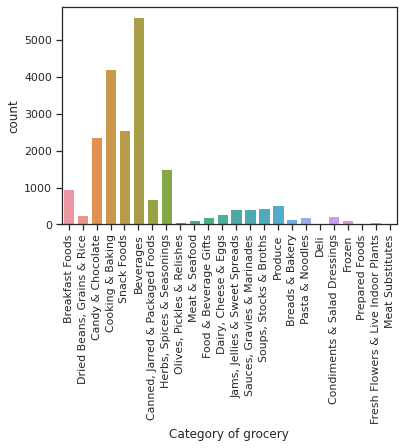

<Figure size 720x360 with 0 Axes>

In [48]:


from matplotlib import pyplot as plt


plot = sns.countplot(x='Category of grocery', data=merged_data)

plt.setp(plot.get_xticklabels(), rotation=90)

plt.figure(figsize=(10,5))


In [49]:
final_list_of_categories = list(list_of_all_categories)
# final_list_of_categories.remove('Games')

In [50]:
final_list_of_categories

['Beverages',
 'Breads & Bakery',
 'Breakfast Foods',
 'Candy & Chocolate',
 'Canned, Jarred & Packaged Foods',
 'Condiments & Salad Dressings',
 'Cooking & Baking',
 'Dairy, Cheese & Eggs',
 'Deli',
 'Dried Beans, Grains & Rice',
 'Food & Beverage Gifts',
 'Fresh Flowers & Live Indoor Plants',
 'Frozen',
 'Herbs, Spices & Seasonings',
 'Jams, Jellies & Sweet Spreads',
 'Meat & Seafood',
 'Meat Substitutes',
 'Olives, Pickles & Relishes',
 'Pasta & Noodles',
 'Prepared Foods',
 'Produce',
 'Sauces, Gravies & Marinades',
 'Snack Foods',
 'Soups, Stocks & Broths']

In [51]:
# retaining rows where 'Category of grocery' is not 'NaN'
merged_data = merged_data[merged_data['Category of grocery'].notna()]

In [52]:
# grocery_metadata = grocery_metadata[grocery_metadata['Category of grocery']!='Games']
grocery_metadata.reset_index(drop=True, inplace=True)
grocery_metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,Item ID,imageURL,imageURLHighRes,details,Category of grocery
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,[],[],NaN,"Dairy, Cheese & Eggs"
1,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,[Jazz up your cakes with a sparkling monogram ...,,Letter C - Swarovski Crystal Monogram Wedding ...,[],,Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,,"September 21, 2010",$29.95,1888861118,[],[],NaN,Cooking & Baking
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter H - Swarovski Crystal Monogram Wedding ...,[],,Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$11.45,1888861517,[],[],NaN,Cooking & Baking
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[4.75""]",,Letter S - Swarovski Crystal Monogram Wedding ...,[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00,1888861614,[],[],NaN,Cooking & Baking
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter J - Swarovski Crystal Monogram Wedding ...,[],,Other,"[Large Letter - Height 4.75""]","[>#1,071,856 in Kitchen & Dining (See Top 100 ...",[],Amazon Home,,"September 11, 2011",$10.99,1888861533,[],[],NaN,Cooking & Baking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275382,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",,[Caffarel fruit jellies are a product of Italy...,,"Caffarel Fruit Jellies, Organic Assorted, 200 ...","[B01HULC3TC, B07C8L4NWL, B014UTG6D6, B01M3UOLAP]",,Caffarel,[],"369,384 in Grocery & Gourmet Food (",[],Grocery,,,,B01HJFBN9A,[],[],{' Product Dimensions: ': '11.8 x 4.7...,"Jams, Jellies & Sweet Spreads"
275383,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Hampton Creeks Just Mayo Truffle makes fancy ...,,"HAMPTON CREEK Spo Just Truffle Mayo, 12 Ounce","[B00WNAEX2Q, B071LD7PMJ, B01HJF6FRA, B072HG8GF...",,Hampton Creek,[],"113,710 in Grocery & Gourmet Food (",[],Grocery,,,$10.89,B01HJFC704,[],[],"{'Shipping Weight:': '12 ounces (', 'Domestic ...",Condiments & Salad Dressings
275384,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Nothing compares with the classically zesty f...,,"HAMPTON CREEK Just Ranch Dressing, 12 Fluid Ounce","[B071LD7PMJ, B00KOHNX6C, B00OVN2F64, B01HJEHE9...",,Hampton Creek,[],"21,731 in Grocery & Gourmet Food (",[],Grocery,,,$10.95,B01HJF6FRA,[],[],"{'Shipping Weight:': '10.4 ounces (', 'Domesti...",Condiments & Salad Dressings
275385,"[Grocery & Gourmet Food, Herbs, Spices & Seaso...",,[],,Gourmet Pure Vanilla Bean Pastes - Organically...,"[B00DUF219A, B01HJHX9ZO, B07K4K26PQ, B000H7ENQ...",,Heilala Vanilla,[],472 in Grocery & Gourmet Food (,[],Grocery,,,$14.97,B01HJHSVG6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '5.6 ounces (', 'ASIN: ':...","Herbs, Spices & Seasonings"


In [53]:
merged_data.reset_index(drop = True, inplace = True)
merged_data

,overall,verified,reviewTime,reviewerID,Item ID,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,Year,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,Category of grocery
0,5.0,True,"02 1, 2016",A1D655KMQW008Q,B00KQ1I90Q,damien,Awesome!,Five Stars,1454284800,NaN,NaN,NaN,2016,"[Grocery & Gourmet Food, Breakfast Foods, Cere...",,"[Quaker Puffed Rice, 6.4000-ounces , 2pk, Stat...",,"Quaker Puffed Rice, 6.3 oz (Pack of 2)",[],,Quaker,[],"186,735 in Grocery & Gourmet Food (","[B01M8NH9IW, B00WJCD0FO, B00PO9IGJ4, B01N3VQHQ...",Grocery,,,,[],[],"{'Shipping Weight:': '1.2 pounds', 'Domestic S...",Breakfast Foods
1,5.0,True,"10 12, 2015",A39M54748K1N2O,B00KQ1I90Q,Jim,Still good to the last bite.,Five Stars,1444608000,NaN,NaN,NaN,2015,"[Grocery & Gourmet Food, Breakfast Foods, Cere...",,"[Quaker Puffed Rice, 6.4000-ounces , 2pk, Stat...",,"Quaker Puffed Rice, 6.3 oz (Pack of 2)",[],,Quaker,[],"186,735 in Grocery & Gourmet Food (","[B01M8NH9IW, B00WJCD0FO, B00PO9IGJ4, B01N3VQHQ...",Grocery,,,,[],[],"{'Shipping Weight:': '1.2 pounds', 'Domestic S...",Breakfast Foods
2,1.0,True,"12 21, 2014",A1UZIG6AHDAHM4,B0013JQ1GO,M. Jang,Very disappointed with this product. I've purc...,Very disappointed with this product,1419120000,2,NaN,NaN,2014,"[Grocery & Gourmet Food, Dried Beans, Grains &...",,[Committed to producing the finest quality ric...,,Lundberg Family Farms Organic California Whit...,"[B000Z8ZN4U, B005765TD0, B0039KERAM, B004T2TF7...",,Lundberg,[],"32,953 in Grocery & Gourmet Food (","[B000Z8ZN4U, B01E6OKVY0, B00480GXY0, B0019LRH5...",Grocery,,,$74.66,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '3 x 3 x 6....,"Dried Beans, Grains & Rice"
3,5.0,True,"11 4, 2017",A2C2KBRQJEQ55O,B00UAJ7XIS,Max1998,good,Five Stars,1509753600,NaN,{'Style:': ' Birthday'},NaN,2017,"[Grocery & Gourmet Food, Candy & Chocolate, Ch...",,[GODIVA's Happy Birthday Cake Truffle Flight i...,,Godiva Chocolatier Happy Birthday Cake Chocola...,"[B01MQNZ457, B01AMSZN2E, B00OPENQ80, B075V6L3H...",,GODIVA Chocolatier,[],"1,830 in Grocery & Gourmet Food (",[],Grocery,,,$17.00,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '10.9 x 7.9...,Candy & Chocolate
4,5.0,True,"08 7, 2018",A22AR3K1YW12EO,B00UAJ7XIS,Famousk1,I got this for my wife's birthday in the begin...,is amazing.,1533600000,NaN,{'Style:': ' Birthday'},NaN,2018,"[Grocery & Gourmet Food, Candy & Chocolate, Ch...",,[GODIVA's Happy Birthday Cake Truffle Flight i...,,Godiva Chocolatier Happy Birthday Cake Chocola...,"[B01MQNZ457, B01AMSZN2E, B00OPENQ80, B075V6L3H...",,GODIVA Chocolatier,[],"1,830 in Grocery & Gourmet Food (",[],Grocery,,,$17.00,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{' Product Dimensions: ': '10.9 x 7.9...,Candy & Chocolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21426,3.0,True,"09 12, 2013",A1EOYQQNPY2P5G,B0083COD6O,SMJ,Too expensive for what you get. Taste is fine...,ok,1378944000,NaN,NaN,NaN,2013,"[Grocery & Gourmet Food, Candy & Chocolate, Br...",,"[The first of their kind, Dream Blends drinks ...",,Dream Blends Unsweetened Enriched Original Alm...,[],,Dream Blends,[],"315,668 in Grocery & Gourmet Food (",[],Grocery,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '13.4 pounds', 'Domestic ...",Candy & Chocolate
21427,5.0,True,"05 9, 2016",ARS1GMA6C6RT0,B00TLHDHGC,Anna,Love McDougall's products! This is a great so...,Love McDougall's products,1462752000,NaN,NaN,NaN,2016,"[Grocery & Gourmet Food, Soups, Stocks & Broth...",,[Clear noodles are popular in Asian cuisine be...,,Dr. McDougall's Right Foods Asian Soup

In [54]:
# merged_data.to_csv('/content/drive/MyDrive/Amazon grocery/Amazon grocery All Data.csv')

In [55]:
# grocery_metadata.to_csv('/content/drive/MyDrive/Amazon grocery/Amazon grocery Product Meta Data.csv')

# **Recommendations based on popularity of products:**

Getting counts of every item, i.e. the number of times an item was reviewed:

In [56]:
merged_data['Item ID'].value_counts()

B00BUKL666    144
B00D3M2QP4    123
B008QMX2SG    115
B0001LO3FG     74
B00R7PWK7W     67
             ... 
B00R61LSWK      1
B0012DFMZ2      1
B013PHKYKK      1
B019RG41F2      1
B000PYAGFU      1
Name: Item ID, Length: 10969, dtype: int64

Saving the above in a dictionary:

In [57]:
# items_dict is already sorted
items_dict = merged_data['Item ID'].value_counts()

## **Most Popular 'n' products recommender:**

The function most_popular_n_recommender(n) returns the most popular 'n' products, popularity being measured by the no. of times a product was bought / reviewed.

In [58]:
def most_popular_n_recommender(n):
  top_n_items_dict = items_dict[:n]
  top_n_items = list(top_n_items_dict.keys())
  relevant_counts_from_input_category = list(dict(items_dict).values())
  relevant_counts_from_input_category_n = relevant_counts_from_input_category[:n]
  # making a data frame format of the top_n_items

  top_n_items_df = pd.DataFrame({"Item ID":top_n_items,
                                 "No. of times bought": relevant_counts_from_input_category_n})
  
  output_df = pd.merge(grocery_metadata,top_n_items_df, on = 'Item ID')

  # retaining only the relevant columns for displaying

  output_df = pd.DataFrame({"Item ID":output_df['Item ID'], 
                            "Title": output_df['title'],
                            "Brand": output_df['brand'],
                            "Category": output_df['Category of grocery'],
                            "No. of times bought": output_df['No. of times bought']})
  

  output_df = output_df.sort_values(by='No. of times bought',ascending=False)
  output_df.reset_index(drop = True, inplace = True)
  return output_df

In [59]:
most_popular_n_recommender(10)

,Item ID,Title,Brand,Category,No. of times bought
0,B00BUKL666,"KIND Bars, Dark Chocolate Nuts &amp; Sea Salt,...",KIND,Snack Foods,144
1,B00D3M2QP4,"KIND Bars, Dark Chocolate Chili Almond, Gluten...",KIND,Breakfast Foods,123
2,B008QMX2SG,"Kind Bars, Madagascar Vanilla Almond, Gluten F...",KIND,Snack Foods,115
3,B0001LO3FG,Twinings of London Pure Camomile Herbal Tea Ba...,Twinings,Beverages,74
4,B0001LO3FG,Twinings of London Pure Camomile Herbal Tea Ba...,Twinings,Beverages,74
5,B00R7PWK7W,"KIND Bars, Caramel Almond and Sea Salt, Gluten...",KIND,Snack Foods,67
6,B000F4DKAI,Twinings of London English Afternoon Black Tea...,Twinings,Beverages,62
7,B000X3TPHS,"YumEarth Organic Lollipops, Assorted Flavors, ...",YumEarth,Candy & Chocolate,59
8,B00KSN9TME,"KIND Bars, Dark Chocolate Nuts &amp; Sea Salt,...",KIND,Snack Foods,52
9,B000E1FZHS,"Planters Dry Roasted Peanuts, Dry Roasted, Lig...",Planters,Cooking & Baking,51


## **Most popular 'n' products recommender, based on an input 'category':**

Given a category, 'n' most popular products from the given category is displayed.

In [60]:
def most_popular_n_recommender_category_wise(n, input_category):
  # group grocery review data by all categories
  grouped_grocery_data = merged_data.groupby(by = 'Category of grocery')

  # get the data relevant to the input_category
  input_category_df = grouped_grocery_data.get_group(input_category)

  # getting counts of how many times each item was bought

  items_dict_category_wise = input_category_df['Item ID'].value_counts()

  # storing only the item IDs
  # this is sorted already in descending order of 'no. of times bought'
  relevant_items_from_input_category = list(items_dict_category_wise.keys())
  relevant_counts_from_input_category = list(dict(items_dict_category_wise).values()) 
  
  # taking only the first n item IDs

  relevant_items_from_input_category_n = relevant_items_from_input_category[:n]
  relevant_counts_from_input_category_n = relevant_counts_from_input_category[:n]
  # getting the corresponding product metadata

  top_n_items_category_wise_df = pd.DataFrame({"Item ID":relevant_items_from_input_category_n, 
                                               "No. of times bought":relevant_counts_from_input_category_n })
  
  output_df = pd.merge(grocery_metadata,top_n_items_category_wise_df, on = 'Item ID')

  # retaining only the relevant columns for displaying

  output_df = pd.DataFrame({"Item ID":output_df['Item ID'], 
                            "Title": output_df['title'],
                            "Brand": output_df['brand'],
                            "Category": output_df['Category of grocery'],
                            "No. of times bought":output_df['No. of times bought']})
  
  output_df = output_df.drop_duplicates()
  output_df = output_df.sort_values(by = 'No. of times bought', ascending = False)
  output_df.reset_index(drop = True, inplace = True)
  return output_df



In [61]:
most_popular_n_recommender_category_wise(5, 'Beverages')

,Item ID,Title,Brand,Category,No. of times bought
0,B0001LO3FG,Twinings of London Pure Camomile Herbal Tea Ba...,Twinings,Beverages,74
1,B000F4DKAI,Twinings of London English Afternoon Black Tea...,Twinings,Beverages,62
2,B00XA8XWGS,"Twinings of London Christmas Black Tea Bags, 2...",Twinings,Beverages,44
3,B000168QTU,"Celestial Seasonings Tension Tamer Tea, 20 ct",Celestial Seasonings,Beverages,42
4,B00542YXFW,"Davidson's Tea Bulk, Anise Seed, 16-Ounce Bag",Davidson's Tea,Beverages,36


## **Most popular 'n' products, from all of the 24 categories:**

Most popular 'n' products from each of the 24 categories is displayed.

In [62]:
def most_popular_n_products_all_categories(n):

  # empty list for storing data frames relevant to each category
  df_list = []
  for cat in final_list_of_categories:
    temp = most_popular_n_recommender_category_wise(n, cat)

    # temp stores the most popular 'n' products from the category 'cat'

    # storing temp in the df_list for later

    df_list.append(temp)

  # creating a data frame out of all the individual category-wise data frames
  output_df = pd.concat(df_list)
  output_df.reset_index(drop = True, inplace = True)
  return output_df


In [63]:
most_popular_n_products_all_categories(2)

,Item ID,Title,Brand,Category,No. of times bought
0,B0001LO3FG,Twinings of London Pure Camomile Herbal Tea Ba...,Twinings,Beverages,74
1,B000F4DKAI,Twinings of London English Afternoon Black Tea...,Twinings,Beverages,62
2,B000YGISMC,FRUIT CAKE Boxed 2 lb Dark Recipe Claxton Frui...,Claxton Fruitcake,Breads & Bakery,7
3,B000F9XBF2,"Stella D'Oro Cookies, Almond Delight, 9 Ounce ...",Stella D'oro,Breads & Bakery,4
4,B00D3M2QP4,"KIND Bars, Dark Chocolate Chili Almond, Gluten...",KIND,Breakfast Foods,123
5,B001181NBA,Bionutritional Power Crunch Bars Peanut Butter...,Bio Nutritional,Breakfast Foods,29
6,B000X3TPHS,"YumEarth Organic Lollipops, Assorted Flavors, ...",YumEarth,Candy & Chocolate,59
7,B000HDK0DC,"YumEarth Organic Lollipops, Assorted Flavors, ...",YumEarth,Candy & Chocolate,30
8,B000E1FXQ6,"Kraft Easy Mac Triple Cheese, 2.05-Ounce Micro...",Kraft,"Canned, Jarred & Packaged Foods",16
9,B000CQ01GU,"Annie's Macaroni and Cheese, Shells &amp; Whit...",Annie's Homegrown,"Canned, Jarred & Packaged Foods",14


# **Preparing data-frame 'surprise_data', for implementing algorithms from surpriseLib.**

Oversampling is done from the groups of rating 4.0, 3.0, 2.0 and 1.0 - since they have very low frequency compared to ratings of 5.0.
A balanced data set is constructed to train the algorithm.

The idea here behind the manual oversampling, was to replicate each group of ratings (1.0, 2.0, 3.0, 4.0) an appropriate number of times, so as to have fairly the same number of data points as the group 5.0

In [64]:
surprise_data = pd.DataFrame ({"User ID":merged_data.reviewerID,"Item ID":merged_data['Item ID'],"Ratings":merged_data.overall})

In [65]:
#surprise_data = surprise_data.dropna()

In [66]:
grouped_sd = surprise_data.groupby('Ratings')
group_five = grouped_sd.get_group(5.0)
# group_five = group_five.sample(frac=1, replace=False, random_state=1)
group_5 = group_five

In [67]:
group_four = grouped_sd.get_group(4.0)
group_three = grouped_sd.get_group(3.0)
group_two = grouped_sd.get_group(2.0)
group_one = grouped_sd.get_group(1.0)

In [68]:
#group_five

In [69]:

count_five = len(group_5)
def get_replicator_value(group_x):
  count_x = len(group_x)
  k=1
  sum = 0
  while sum < count_five:
    sum = sum + count_x
    k=k+1

  return k-2


In [70]:
group_4 = pd.concat([group_four]*get_replicator_value(group_four),ignore_index=True)

In [71]:
group_3 = pd.concat([group_three]*get_replicator_value(group_three),ignore_index=True)


In [72]:
group_2 = pd.concat([group_two]*get_replicator_value(group_two),ignore_index=True)


In [73]:
group_1 = pd.concat([group_one]*get_replicator_value(group_one),ignore_index=True)


In [74]:
surprise_data_balanced = pd.concat([group_5,group_4,group_3,group_2,group_1])
surprise_data_balanced = surprise_data_balanced.sample(frac=1,random_state=42)
surprise_data_balanced

,User ID,Item ID,Ratings
2916,A2ZE3OKI52EUPZ,B00E2R32UM,2.0
9394,A1ZT0V1S4Z3KKF,B000LRFX0E,2.0
12580,ADXGD82289X3O,B000CD1LH6,3.0
9835,A364WZYBZG8ERP,B00AW8CAK8,1.0
8843,ALAIBQ2W1AN8P,B00R7PWK7W,4.0
...,...,...,...
7338,A2RYWPOL4NN2KG,B013TXNBT6,3.0
8542,A2SW4LC0EZO4IF,B00D1DOTGO,5.0
10840,A2V026TK7H80V3,B014UAGGJ4,2.0
1141,A307MVUVRRNEYD,B002863BIW,5.0


### **Data set is now balanced with respect to the five classes of ratings:**

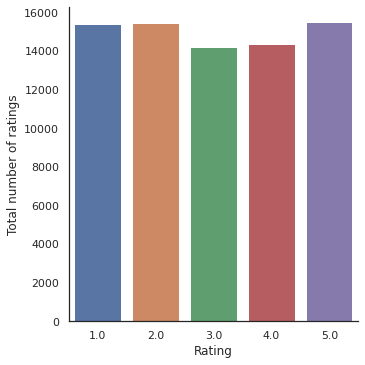

In [75]:
sns.set_theme(style='ticks')
with sns.axes_style('white'):
    g = sns.catplot(x="Ratings", data=surprise_data_balanced,kind='count')
    g.set_ylabels("Total number of ratings")
    g.set_xlabels("Rating")

The data is split into train and test sets, with 25% being kept aside for testing.

In [76]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(surprise_data_balanced,test_size=0.25, random_state = 42)

# doing the split with sklearn and not surpriseLib so that we can drop duplicates from the test_df to avoid inflating accuracy metrics, etc.

In [77]:
test_df = test_df.drop_duplicates()
test_df

,User ID,Item ID,Ratings
11350,A2DTML2LE6NST9,B00K5TDC1A,3.0
8939,AOL68C6GSVQGJ,B0094FMHWQ,3.0
15092,A2KK7CJ62YEZDG,B01G5RZNH6,2.0
7503,AY49JOXTLDOG2,B00CPJ6XVO,4.0
3162,A1IYH3S0TFWOU,B000YQUY2E,3.0
...,...,...,...
20504,AZEVEJQ0I7S7S,B00LH6ZAN8,5.0
8118,AFWT5G6BIY89E,B00EHLRMOK,5.0
19592,A3F68PICUDQ9YE,B001IZ7NHY,5.0
15711,A1MZ4WE5Q21ACY,B004YLD7SS,5.0


In [78]:
from surprise import Reader
reader = Reader(rating_scale=(1, 5))

In [79]:
from surprise import Dataset
# The columns must correspond to user id, item id and ratings (in that order)
train_surprise_data = Dataset.load_from_df(train_df, reader)
test_surprise_data = Dataset.load_from_df(test_df, reader)

In [80]:
len(np.unique(merged_data['reviewerID'])), len(np.unique(merged_data['Item ID']))

(18550, 10969)

# **Constructing a Recommender function to call all algorithms:**

In [81]:
# first import the modules required for all the algorithms

from surprise import accuracy
from surprise import BaselineOnly
from surprise import NormalPredictor
from surprise import SVD
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import KNNWithZScore
from surprise import NMF
from surprise import SVDpp
from surprise import SlopeOne
from surprise import CoClustering
from surprise.model_selection import train_test_split
trainset, fake_testset = train_test_split(train_surprise_data,test_size=0.01,random_state=42)
fake_trainset, testset = train_test_split(test_surprise_data, test_size=1.0,random_state=42)
# the train_test_split from surprise does not allow train_size = 1.0, or test_size = 0.0, hence test_size = 0.01 is used.

In [82]:
from collections import defaultdict

global rmse_scores
global accuracy_scores
global mean_absolute_error
rmse_scores = defaultdict(list)
accuracy_scores = defaultdict(list)
mean_absolute_error = defaultdict(list)

Two functions are defined, recommender(algo_string) and get_result(predictions, algo_string), which will be called later to implement each of the algorithms in surpriseLib. While recommender(algo_string) returns the object of the form 'algo()', get_result(predictions, algo_string) returns a data frame of the predictions on the test set. 'algo_string' is the paramater for the name of an algorithm from surpriseLib.

In [83]:
#This is just choosing the algorithm to implement and returning that object 'algo()'

def recommender(algo_string):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)
  # algo is a string denoting the algo to be implemented

  if algo_string == 'SVD':
    algo = SVD()

  elif algo_string == 'SVDpp':
    algo = SVDpp()

  elif algo_string == 'SlopeOne':
    algo = SlopeOne()

  elif algo_string == 'CoClustering':
    algo = CoClustering()

  elif algo_string == 'KNNBasic':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNBasic(sim_options=sim_options)

  elif algo_string == 'KNNWithZScore':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNWithZScore(sim_options=sim_options)

  elif algo_string == 'KNNBaseline':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNBaseline(sim_options=sim_options)   
  
  elif algo_string == 'KNNWithMeans':
    sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
    algo = KNNWithMeans(sim_options=sim_options)

  elif algo_string == 'NMF':
    algo = NMF()

  elif algo_string == 'BaselineOnly':
    algo = BaselineOnly()

  elif algo_string == 'NormalPredictor':
    algo = NormalPredictor()

  return algo

In [84]:
def get_result(predictions,algo_string):
  rmse_score = round(accuracy.rmse(predictions),4)

  n = len(predictions)

  User_ID=n*[0]
  Item_ID=n*[0]
  True_Rating=n*[0]
  Predicted_Rating=n*[0]
  Absolute_Error=n*[0]
  Rounded_Off_Predicted_Rating = n*[0]
  Classification = n*[0]
  for i in range(n):
    User_ID[i] = predictions[i].uid
    Item_ID[i] = predictions[i].iid
    True_Rating[i] = predictions[i].r_ui
    Predicted_Rating[i] = predictions[i].est 
    Absolute_Error[i] = abs(predictions[i].est-predictions[i].r_ui)
    Rounded_Off_Predicted_Rating[i] = round(predictions[i].est,0)

    if True_Rating[i] == Rounded_Off_Predicted_Rating[i]:
      Classification[i] = 1
    else:
      Classification[i] = 0
  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,"True Rating":True_Rating,
                           "Predicted Rating":Predicted_Rating,
                            "Rounded Off Predicted Rating":Rounded_Off_Predicted_Rating,
                           "Absolute Error":Absolute_Error, "Is the predicted rating correct?": Classification})
  
  Result = Result.sort_values(by='Absolute Error')

  # Accuracy Calculation
  x = Result['Is the predicted rating correct?'].value_counts()
  right = x[1]
  wrong = x[0]
  accuracy_score = round((right / (right + wrong)) * 100, 4)

  rmse_scores[algo_string] = rmse_score
  accuracy_scores[algo_string] = accuracy_score
  mean_absolute_error[algo_string] = Result['Absolute Error'].sum()/len(Result)
  

  return Result

In [85]:
global time_dict_of_models
time_dict_of_models = defaultdict(list)

# this dict stores the time taken (in seconds) by each model

# **CALLING ALL ALGORITHMS IN SURPRISE LIB:**

The name of every algorithm is displayed, along with the predictions as well as a histogram of the absolute error of the predicted ratings.

# **BaselineOnly:**

In [86]:
start_baseline_only = time.time()
algo_baseline_only = recommender('BaselineOnly')

algo_baseline_only.fit(trainset)
predictions_baseline_only = algo_baseline_only.test(testset)

end_baseline_only = time.time()
time_dict_of_models['BaselineOnly'] = end_baseline_only - start_baseline_only

Estimating biases using als...


In [87]:
Result_baseline_only = get_result(predictions_baseline_only,'BaselineOnly')
Result_baseline_only

RMSE: 1.2895


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
1315,AZ5A2S8UZ7RTL,B005TKVU64,4.0,4.000104,4.0,0.000104,1
180,A1MJM7KWFI8G69,B0001LO3FG,4.0,4.000761,4.0,0.000761,1
7948,A1T31TK89HNOMW,B0000D9N63,3.0,2.998540,3.0,0.001460,1
2294,A15YJHJXI705CW,B000X3TPHS,4.0,3.998501,4.0,0.001499,1
1197,A1LWMPJUMGZOKL,B000X3TPHS,4.0,3.998501,4.0,0.001499,1
...,...,...,...,...,...,...,...
5907,A2RTWCLPRY10EE,B0050WVLII,5.0,1.998120,2.0,3.001880,0
4454,A2UT979TF6WTXS,B003SRHDMK,5.0,1.987578,2.0,3.012422,0
2414,ACDLG8CPVJABI,B00L8HPX6A,5.0,1.978477,2.0,3.021523,0
3677,A1ZNEWUQVP68U4,B000F9XBF2,5.0,1.930035,2.0,3.069965,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa367cc7550>]],
      dtype=object)

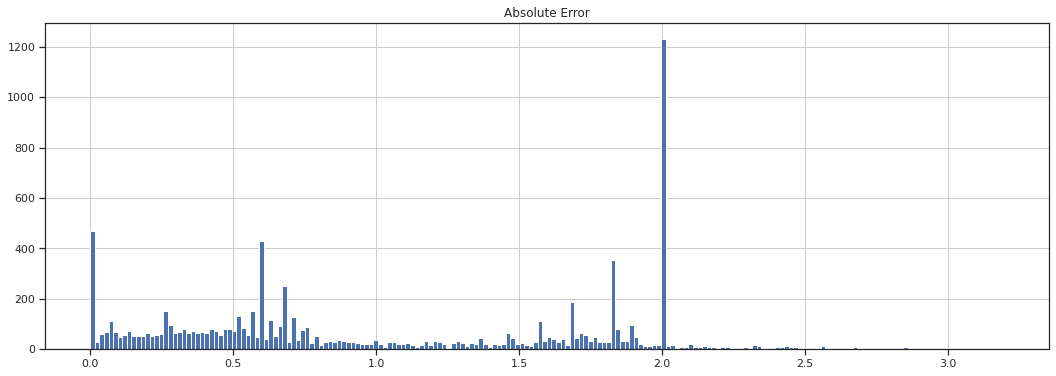

In [88]:
Result_baseline_only.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Normal Predictor:**

In [89]:
start_np = time.time()
algo_np = recommender('NormalPredictor')

algo_np.fit(trainset)
predictions_np = algo_np.test(testset)

Result_np = get_result(predictions_np,'NormalPredictor')
Result_np
end_np = time.time()
time_dict_of_models['NormalPredictor'] = end_np - start_np

RMSE: 1.9788


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3629928d0>]],
      dtype=object)

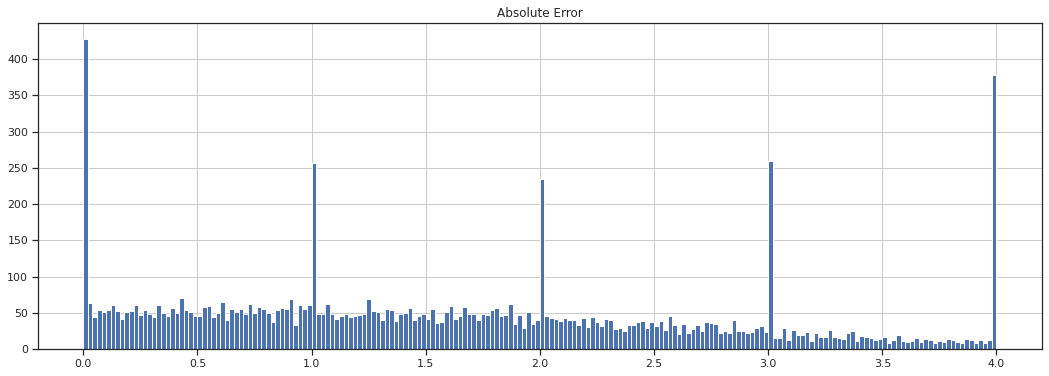

In [90]:
Result_np.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SVD:**

In [91]:
start_svd = time.time()
algo_svd = recommender('SVD')

algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

end_svd = time.time()
time_dict_of_models['SVD'] = end_svd - start_svd

In [92]:

Result_svd = get_result(predictions_svd,'SVD')
Result_svd

RMSE: 1.1629


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
279,AM4P804SQ95X4,B00B07YKL2,1.0,1.000000,1.0,0.000000,1
3907,A11H4S8MDWM6V7,B00H15H5G4,1.0,1.000000,1.0,0.000000,1
6305,AL9HJY3YUPGLD,B000168QTU,5.0,5.000000,5.0,0.000000,1
4331,A2V0YH86NKTGX1,B00ELJVY92,1.0,1.000000,1.0,0.000000,1
8437,A23W8M25M9PRIF,B00SHCB5EI,1.0,1.000000,1.0,0.000000,1
...,...,...,...,...,...,...,...
5695,AADNUIH39LXC5,B007DMV732,5.0,2.407037,2.0,2.592963,0
5257,A10OIHO7FLVSBC,B015G7EFXO,5.0,2.358502,2.0,2.641498,0
2414,ACDLG8CPVJABI,B00L8HPX6A,5.0,2.356230,2.0,2.643770,0
3677,A1ZNEWUQVP68U4,B000F9XBF2,5.0,2.353934,2.0,2.646066,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36c6e91d0>]],
      dtype=object)

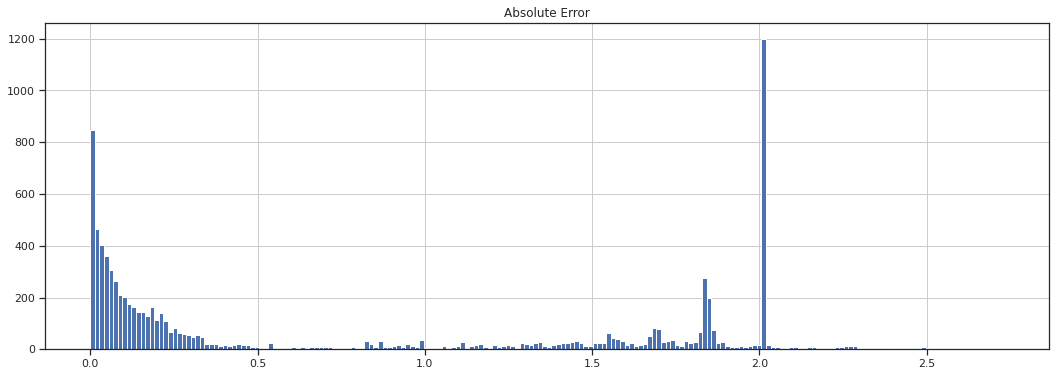

In [93]:
Result_svd.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SVD++**:


In [94]:
start_svdpp = time.time()
algo_svdpp = recommender('SVDpp')

algo_svdpp.fit(trainset)
predictions_svdpp = algo_svdpp.test(testset)

end_svdpp = time.time()
time_dict_of_models['SVDpp'] = end_svdpp - start_svdpp

In [95]:
Result_svdpp = get_result(predictions_svdpp,'SVDpp')
Result_svdpp

RMSE: 1.1133


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
399,AKGDMAAKKYZZS,B00D3M2QP4,5.0,5.000000,5.0,0.000000,1
8091,A3C71H34Y7E2KX,B00XA8XWGS,5.0,5.000000,5.0,0.000000,1
8099,A10GJYKLLJV7VS,B00D3M2QP4,5.0,5.000000,5.0,0.000000,1
6994,A3C8ZT37QTM30I,B00D3M2QP4,5.0,5.000000,5.0,0.000000,1
6965,A2ZI8AK375EB3I,B01H37XMJ8,1.0,1.000000,1.0,0.000000,1
...,...,...,...,...,...,...,...
7117,ABEORX73PIVXG,B00C3FWXIC,5.0,2.545320,3.0,2.454680,0
3506,A2CW8L9L6R6EYL,B00VK5T35C,5.0,2.510127,3.0,2.489873,0
5257,A10OIHO7FLVSBC,B015G7EFXO,5.0,2.472154,2.0,2.527846,0
7978,A1IW9LSLZFW9FK,B001SAUM04,5.0,2.450484,2.0,2.549516,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa367c67590>]],
      dtype=object)

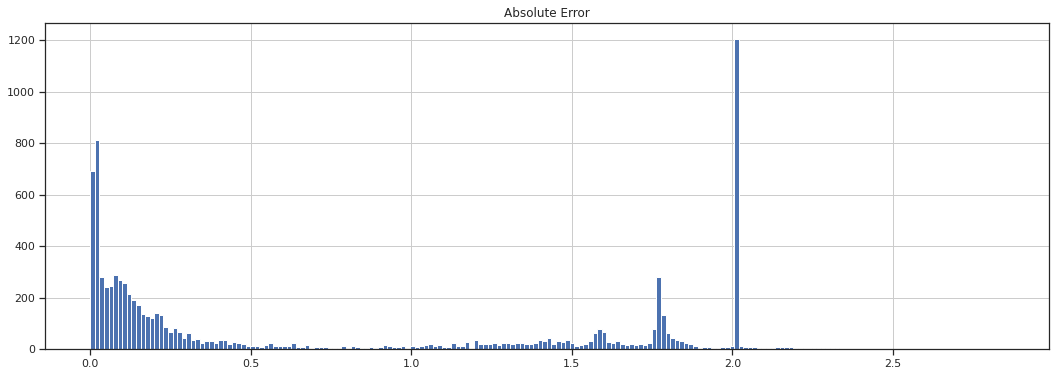

In [96]:
Result_svdpp.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNBaseline**:

In [97]:
start_knn_baseline = time.time()
algo_knn_baseline = recommender('KNNBaseline')

algo_knn_baseline.fit(trainset)
predictions_knn_baseline = algo_knn_baseline.test(testset)


end_knn_baseline = time.time()
time_dict_of_models['KNNBaseline'] = end_knn_baseline - start_knn_baseline

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [98]:
Result_knn_baseline = get_result(predictions_knn_baseline,'KNNBaseline')
Result_knn_baseline

RMSE: 1.2155


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
8872,A3PRGCC4N6DF1E,B00C7VGT00,3.0,3.000000,3.0,0.000000,1
3288,A1VXZJVVLQNX9G,B000V760SS,2.0,2.000000,2.0,0.000000,1
3289,A210HOWGOU1R40,B000VK3RPY,4.0,4.000000,4.0,0.000000,1
3290,A2WFGSN9MXSQUQ,B0000DI145,2.0,2.000000,2.0,0.000000,1
3291,A1HKSCGW5VSLZK,B00AAPFP32,4.0,4.000000,4.0,0.000000,1
...,...,...,...,...,...,...,...
4454,A2UT979TF6WTXS,B003SRHDMK,5.0,1.987578,2.0,3.012422,0
2414,ACDLG8CPVJABI,B00L8HPX6A,5.0,1.978477,2.0,3.021523,0
3677,A1ZNEWUQVP68U4,B000F9XBF2,5.0,1.930035,2.0,3.069965,0
7297,AB64A6GFZ2WLQ,B004ZWJYVK,5.0,1.806131,2.0,3.193869,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa365138c10>]],
      dtype=object)

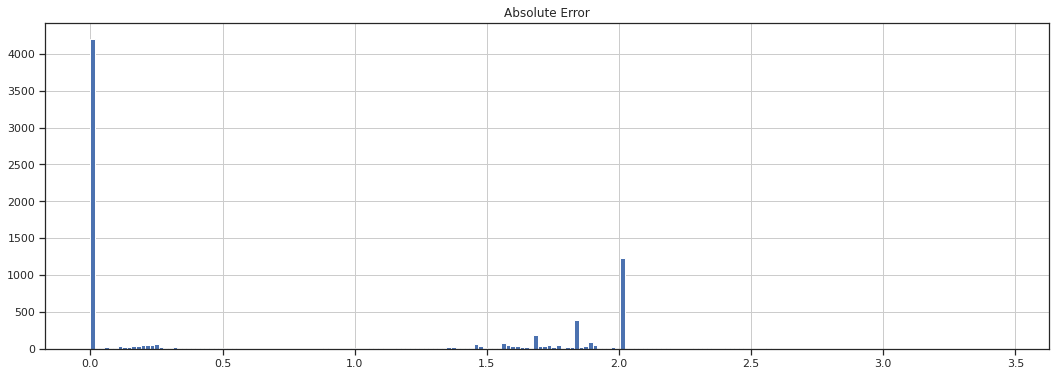

In [99]:
Result_knn_baseline.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNBasic:**

In [100]:
start_knn_basic = time.time()
algo_knn_basic = recommender('KNNBasic')

algo_knn_basic.fit(trainset)
predictions_knn_basic = algo_knn_basic.test(testset)


end_knn_basic = time.time()
time_dict_of_models['KNNBasic'] = end_knn_basic - start_knn_basic

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [101]:
Result_knn_basic = get_result(predictions_knn_basic,'KNNBasic')
Result_knn_basic

RMSE: 1.3163


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
8872,A3PRGCC4N6DF1E,B00C7VGT00,3.0,3.000000,3.0,0.000000,1
3779,A1MY3YJQOCMSEG,B00ERWVI8A,4.0,4.000000,4.0,0.000000,1
3778,AM02MP8W5JR0F,B003KFTPNK,3.0,3.000000,3.0,0.000000,1
3776,A3VWGP4KFK5VSM,B0001M12E0,3.0,3.000000,3.0,0.000000,1
7341,A3E5VDK0YPG58Z,B0078DU1CY,2.0,2.000000,2.0,0.000000,1
...,...,...,...,...,...,...,...
6892,A1JWMGRTN7LXR7,B0000EYK3E,5.0,2.375000,2.0,2.625000,0
5786,AFIXZ6W3MZ2KD,B005CUMJWU,4.0,1.363636,1.0,2.636364,0
4178,A334SM8A3SZLKM,B0001LO3FG,5.0,1.952381,2.0,3.047619,0
6866,A2KK4ICYA75ZF5,B0001689WE,5.0,1.533333,2.0,3.466667,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3f0aa1b10>]],
      dtype=object)

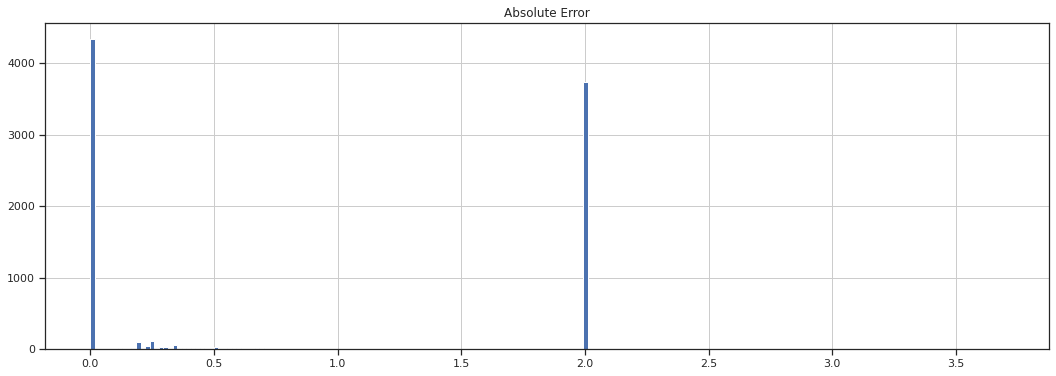

In [102]:
Result_knn_basic.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNWithMeans:**

In [103]:
start_knn_with_means = time.time()
algo_knn_with_means = recommender('KNNWithMeans')

algo_knn_with_means.fit(trainset)
predictions_knn_with_means = algo_knn_with_means.test(testset)


end_knn_with_means = time.time()
time_dict_of_models['KNNWithMeans'] = end_knn_with_means - start_knn_with_means

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [104]:
Result_knn_with_means = get_result(predictions_knn_with_means,'KNNWithMeans')
Result_knn_with_means

RMSE: 1.2775


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
8872,A3PRGCC4N6DF1E,B00C7VGT00,3.0,3.0,3.0,0.0,1
7426,A20ZCHB9EV90D4,B00D0VY8BS,4.0,4.0,4.0,0.0,1
3876,A3TUZD4PN654S9,B00CCQWK6C,4.0,4.0,4.0,0.0,1
3875,A3BJB485ELX65M,B0045Z4JAI,4.0,4.0,4.0,0.0,1
3873,A1OPZ3BUTEL47R,B000ILMQIA,3.0,3.0,3.0,0.0,1
...,...,...,...,...,...,...,...
7978,A1IW9LSLZFW9FK,B001SAUM04,5.0,1.0,1.0,4.0,0
8202,A2J3HAHYXJ9ACB,B000FEXUVW,5.0,1.0,1.0,4.0,0
6048,A2SQJPUCZNHMZE,B001BZ5FH6,5.0,1.0,1.0,4.0,0
2817,AGMFP48DSWUHR,B01DVDCZ9G,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3f981ee90>]],
      dtype=object)

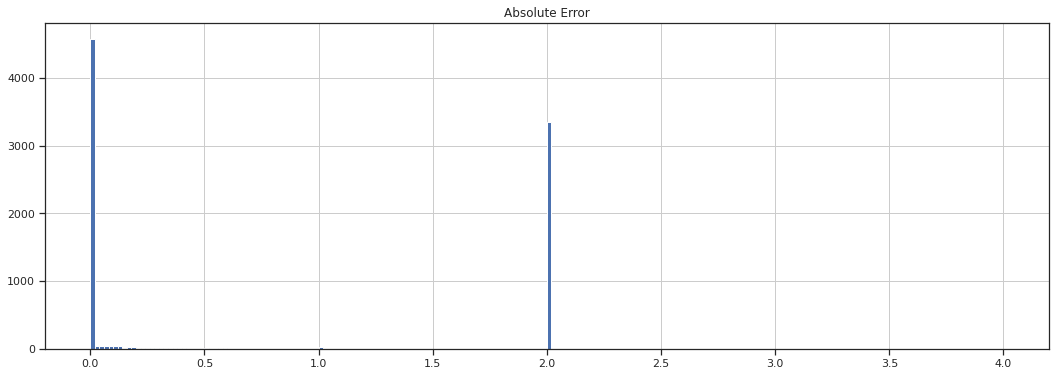

In [105]:
Result_knn_with_means.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **KNNWithZScore:**

In [106]:
start_knn_with_zscore = time.time()
algo_knn_with_zscore = recommender('KNNWithZScore')

algo_knn_with_zscore.fit(trainset)
predictions_knn_with_zscore = algo_knn_with_zscore.test(testset)


end_knn_with_zscore = time.time()
time_dict_of_models['KNNWithZScore'] = end_knn_with_zscore - start_knn_with_zscore

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [107]:
Result_knn_with_zscore = get_result(predictions_knn_with_zscore,'KNNWithZScore')
Result_knn_with_zscore

RMSE: 1.2782


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
8872,A3PRGCC4N6DF1E,B00C7VGT00,3.0,3.0,3.0,0.0,1
7421,A1A65E15TA893P,B005K4Q1T0,4.0,4.0,4.0,0.0,1
3894,A1NJXFN4V5AUOL,B001KZ1AE4,2.0,2.0,2.0,0.0,1
3893,A2BZ4MY3LDCG4K,B000WS1KOA,4.0,4.0,4.0,0.0,1
7422,A6HYV3VEVTUPG,B006Y8D55O,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...
8202,A2J3HAHYXJ9ACB,B000FEXUVW,5.0,1.0,1.0,4.0,0
6048,A2SQJPUCZNHMZE,B001BZ5FH6,5.0,1.0,1.0,4.0,0
196,A1LVP0T6J232ZN,B004VLVQ5W,5.0,1.0,1.0,4.0,0
2817,AGMFP48DSWUHR,B01DVDCZ9G,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa367317590>]],
      dtype=object)

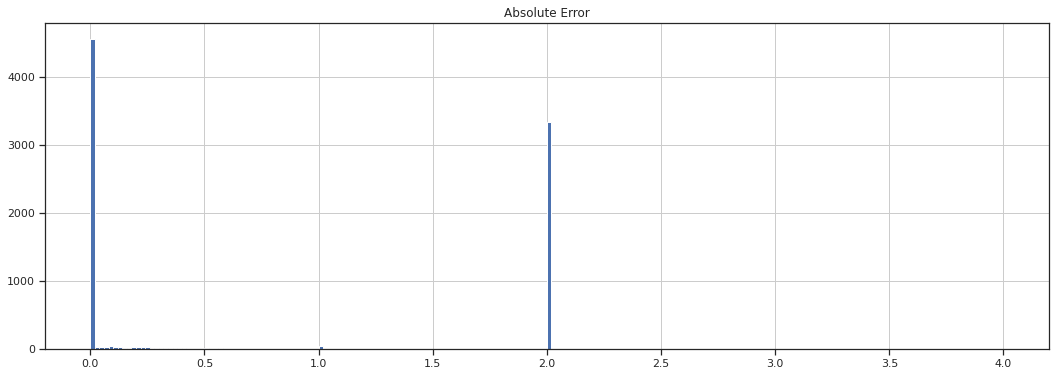

In [108]:
Result_knn_with_zscore.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Non-Negative Matrix Factorization:**

In [109]:
start_nmf = time.time()
algo_nmf = recommender('NMF')

algo_nmf.fit(trainset)
predictions_nmf = algo_nmf.test(testset)


end_nmf = time.time()
time_dict_of_models['NMF'] = end_nmf - start_nmf

In [110]:
Result_nmf = get_result(predictions_nmf,'NMF')
Result_nmf

RMSE: 1.2900


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
6374,A1JUS3W8188HTI,B002GJ3OEM,1.0,1.000000,1.0,0.000000,1
8512,A2ZE0BYLY5LGO8,B004TSXNIA,1.0,1.000000,1.0,0.000000,1
8511,AVHFZQM40STMD,B003SRHDMK,1.0,1.000000,1.0,0.000000,1
6909,A3WSLTE30N0YW,B0040WCQB0,5.0,5.000000,5.0,0.000000,1
5120,ARMQB9715OLA6,B013105TMY,1.0,1.000000,1.0,0.000000,1
...,...,...,...,...,...,...,...
196,A1LVP0T6J232ZN,B004VLVQ5W,5.0,1.206427,1.0,3.793573,0
2817,AGMFP48DSWUHR,B01DVDCZ9G,5.0,1.146215,1.0,3.853785,0
6048,A2SQJPUCZNHMZE,B001BZ5FH6,5.0,1.128472,1.0,3.871528,0
3506,A2CW8L9L6R6EYL,B00VK5T35C,5.0,1.042782,1.0,3.957218,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3636ece90>]],
      dtype=object)

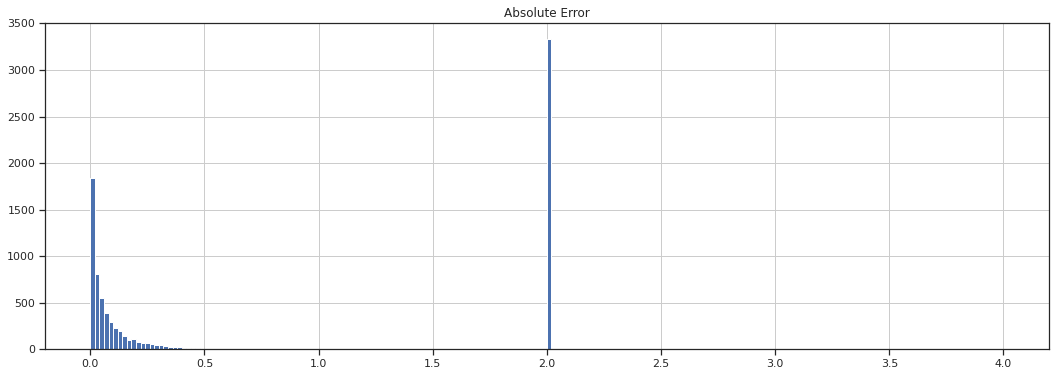

In [111]:
Result_nmf.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **SlopeOne**:

In [112]:
start_slope_one = time.time()
algo_slope_one = recommender('SlopeOne')

algo_slope_one.fit(trainset)
predictions_slope_one = algo_slope_one.test(testset)


end_slope_one = time.time()
time_dict_of_models['SlopeOne'] = end_slope_one - start_slope_one

In [113]:
Result_slope_one = get_result(predictions_slope_one,'SlopeOne')
Result_slope_one

RMSE: 1.2572


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
8872,A3PRGCC4N6DF1E,B00C7VGT00,3.0,3.0,3.0,0.0,1
4087,AB8H7Y75C7TLF,B001EO5RF4,4.0,4.0,4.0,0.0,1
4086,A347C9JN0J179T,B00OLEHNB0,3.0,3.0,3.0,0.0,1
4085,A1TZZE9CFQ63RT,B00FZ4SBIO,2.0,2.0,2.0,0.0,1
4084,A2HBSU9AL4C9SX,B01133LB1E,4.0,4.0,4.0,0.0,1
...,...,...,...,...,...,...,...
3677,A1ZNEWUQVP68U4,B000F9XBF2,5.0,1.0,1.0,4.0,0
6212,A1KPJY1ERPDPE1,B00BJEXF4E,5.0,1.0,1.0,4.0,0
3506,A2CW8L9L6R6EYL,B00VK5T35C,5.0,1.0,1.0,4.0,0
4167,A3PXF0GZQPXOUL,B00K6ZJ1W2,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3634003d0>]],
      dtype=object)

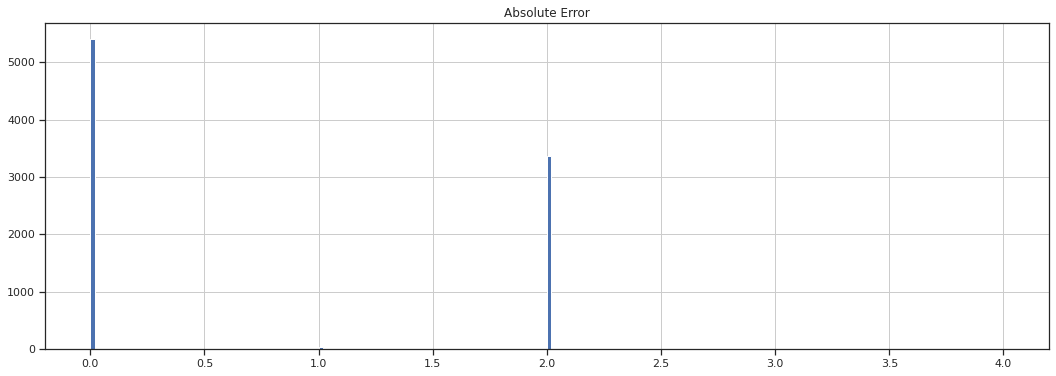

In [114]:
Result_slope_one.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **CoClustering:**

In [115]:
start_coclustering = time.time()
algo_coclustering = recommender('CoClustering')

algo_coclustering.fit(trainset)
predictions_coclustering = algo_coclustering.test(testset)

end_coclustering = time.time()
time_dict_of_models['CoClustring'] = end_coclustering - start_coclustering

In [116]:

Result_coclustering = get_result(predictions_coclustering,'CoClustering')
Result_coclustering

RMSE: 1.4160


,User ID,Item ID,True Rating,Predicted Rating,Rounded Off Predicted Rating,Absolute Error,Is the predicted rating correct?
7644,A3NDBFSHND76SH,B019UN0P84,1.0,1.0,1.0,0.0,1
8362,A3NW0EEZJCCYZ2,B000OQ4A3S,5.0,5.0,5.0,0.0,1
7253,A2VF05T1JNP08W,B009PYNTFK,1.0,1.0,1.0,0.0,1
4187,AQ55H30MZSV0Q,B003Z6ZGZK,1.0,1.0,1.0,0.0,1
1314,A12AYTR1J2U0L1,B002DZKA8W,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...
4178,A334SM8A3SZLKM,B0001LO3FG,5.0,1.0,1.0,4.0,0
5257,A10OIHO7FLVSBC,B015G7EFXO,5.0,1.0,1.0,4.0,0
5923,A2CPAL7DLKFLWM,B0131A6FJA,5.0,1.0,1.0,4.0,0
1949,ADAU274080B4T,B0016LL5DS,5.0,1.0,1.0,4.0,0


### **Histogram of absolute error:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa368464b10>]],
      dtype=object)

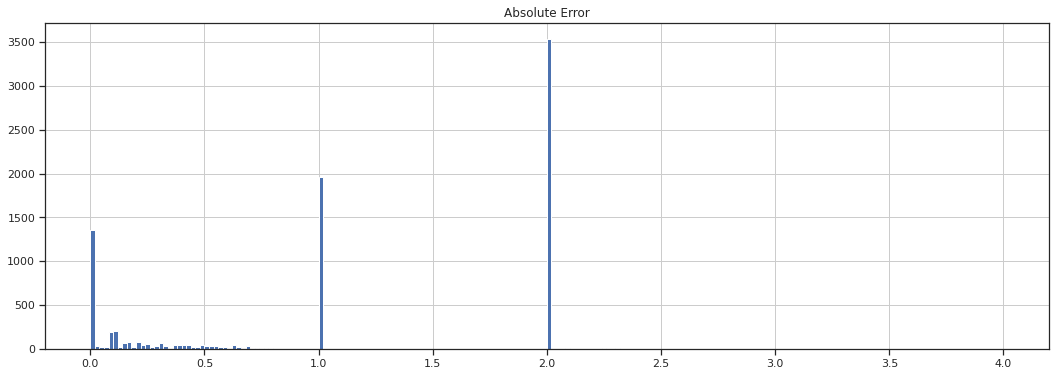

In [117]:
Result_coclustering.hist(column='Absolute Error',bins=200,figsize=(18,6))

# **Tabulated Results of Algorithms and the RMSE obtained:**

In [118]:
algorithms = list(accuracy_scores.keys())
rmse_values = list(rmse_scores.values())
accuracy_values = list(accuracy_scores.values())
mean_absolute_error_values = list(mean_absolute_error.values())
time_taken_by_models_in_seconds = list(time_dict_of_models.values())
no_of_algos = len(algorithms)

tabular_summary = pd.DataFrame({"Recommender Algorithm":algorithms, 
                                "RMSE":rmse_values, "MAE":mean_absolute_error_values, "Accuracy (in %)": accuracy_values,
                                "Time taken to fit and test (in seconds)":time_taken_by_models_in_seconds},
                               index=list(range(1,no_of_algos+1)))
sorted_tabular_summary = tabular_summary.sort_values(by = 'Accuracy (in %)',ascending=False)

sorted_tabular_summary.index = list(range(1,no_of_algos+1))

cm = sns.light_palette("#2ecc90", as_cmap=True)


styler = sorted_tabular_summary.style
styler = styler.set_table_styles([{'selector': 'th', 'props': [('font-size', '16pt')]}])
styler = styler.set_properties(**{'text-align': 'center','font-size': '14pt','width':'260px'})
# styler = styler.background_gradient(cmap=cm)
styler = styler.set_precision(4)
display(styler)

,Recommender Algorithm,RMSE,MAE,Accuracy (in %),Time taken to fit and test (in seconds)
1,SlopeOne,1.2572,0.7813,60.9602,3.1002
2,NMF,1.2900,0.8660,58.2103,6.5610
3,KNNWithMeans,1.2775,0.8266,58.0300,3.8694
4,KNNWithZScore,1.2782,0.8293,57.8271,4.5007
5,SVDpp,1.1133,0.7658,57.5679,13.2013
6,SVD,1.1629,0.8059,56.4183,3.8884
7,KNNBaseline,1.2155,0.8054,56.3056,5.0920
8,KNNBasic,1.3163,0.8872,55.3477,3.5853
9,CoClustering,1.4160,1.1477,30.6323,5.6954
10,BaselineOnly,1.2895,1.0533,28.8628,0.4334


# **Comparison of algorithms using RMSE:**

[Text(0, 0.5, 'Root Mean Squared Error'),
 Text(0.5, 0, 'Recommender Algorithm')]

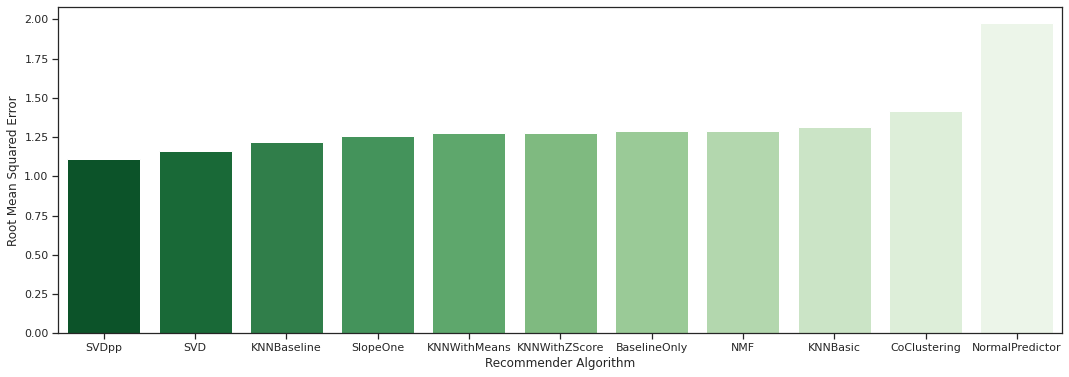

In [119]:
import matplotlib.pyplot as plt

Algorithm_Used = sorted(rmse_scores, key = rmse_scores.get)
RMSE_values = sorted(rmse_scores.values())

fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = RMSE_values, palette='Greens_r')
ax.set(xlabel='Recommender Algorithm', ylabel='Root Mean Squared Error')


# **Comparison of algorithms using MAE:**

[Text(0, 0.5, 'Mean Absolute Error'), Text(0.5, 0, 'Recommender Algorithm')]

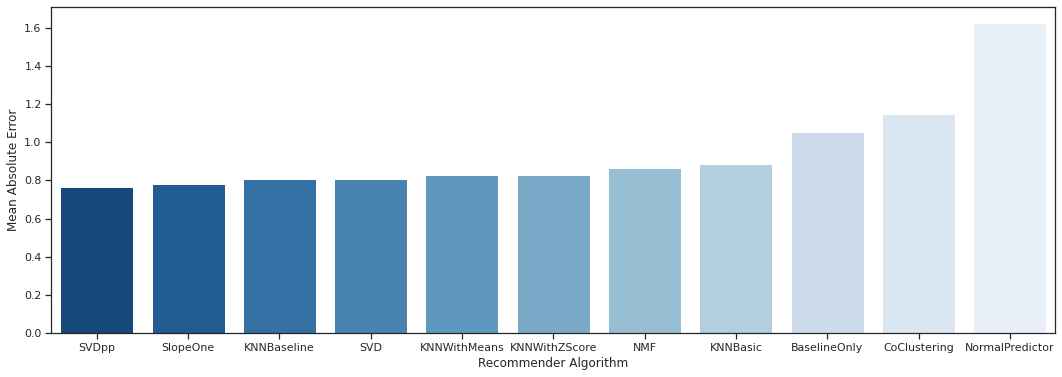

In [120]:

Algorithm_Used = sorted(mean_absolute_error, key = mean_absolute_error.get)
MAE_values = sorted(mean_absolute_error.values())
fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = MAE_values, palette='Blues_r')
ax.set(xlabel='Recommender Algorithm', ylabel='Mean Absolute Error')


 


# **Comparison of algorithms using accuracy:** 

[Text(0, 0.5, 'Accuracy (in %)'), Text(0.5, 0, 'Recommender Algorithm')]

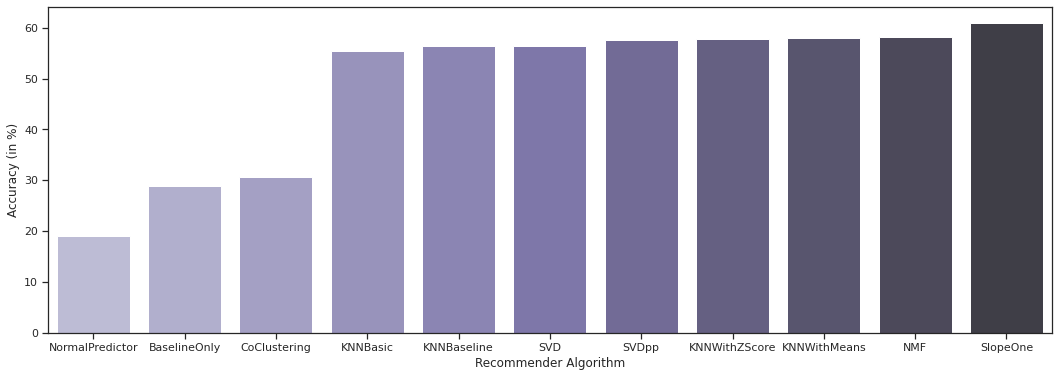

In [121]:

Algorithm_Used = sorted(accuracy_scores, key = accuracy_scores.get)
Accuracy_values = sorted(accuracy_scores.values())

fig = plt.figure(figsize = (18, 6))
ax = sns.barplot(x = Algorithm_Used, y = Accuracy_values, palette='Purples_d')
ax.set(xlabel='Recommender Algorithm', ylabel='Accuracy (in %)')


# **Predicting top 'n' products for a user:**

top_n_recommender is a function that has 3 parameters. 
user_id is an input user_id for whom we want to recommend products.\
n_parameter is the number of 'top n' products we want to recommend.
chosen_algo is the algorithm that'll be used from surpriseLib for the predictions. 
The general idea used here, was to create a test set which comprises of all (user_id, item_id) combinations. That is, we are trying to predict the user_id's ratings for ALL items in our dataset. The predicted ratings are then sorted in descending order, and the top 'n_parameter' products are recommended.

If the user_id is not in the data set, 'Data of this user is unavailable' is displayed.

In [122]:
def top_n_recommender(user_id, n_parameter, chosen_algo):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)

  #lists all users in our data set
  users_of_amazon_dataset = np.unique(merged_data['reviewerID'])
  # if input user_id is not in our amazon data set, return the message
  if user_id not in users_of_amazon_dataset:
    return "Data of this user is unavailable"

  # items is a list of all products in our training data 
  items = np.unique(merged_data['Item ID'])

  # user column just replicates the input user id, len(items) times
  user_column = np.tile(user_id,len(items))

  # initializing the ratings column with zero
  ratings_column = len(items) * [0]

  test_data_frame = pd.DataFrame({"USER":user_column, "ITEM ID":items, "RATING":ratings_column})

  reader = Reader(rating_scale=(1, 5))

  # data = Dataset.load_from_df(surprise_data_balanced, reader)

  # trainset, testset = train_test_split(data, test_size=.25,random_state=42)

  test_set_data = Dataset.load_from_df(test_data_frame, reader)
  trainset_pseudo, test_set_to_be_used = train_test_split(test_set_data, test_size=1.0,random_state=42)


  # CHOOSE ALGORITHM TO IMPLEMENT
  if chosen_algo == 'SVD':
    predicted_ratings = algo_svd.test(test_set_to_be_used)
  elif chosen_algo == 'SVDpp':
    predicted_ratings = algo_svdpp.test(test_set_to_be_used)
  elif chosen_algo == 'NMF':
    predicted_ratings = algo_nmf.test(test_set_to_be_used)
  elif chosen_algo == 'SlopeOne':
    predicted_ratings = algo_slope_one.test(test_set_to_be_used)
  elif chosen_algo == 'CoClustering':
    predicted_ratings = algo_coclustering.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBasic':
    predicted_ratings = algo_knn_basic.test(test_set_to_be_used)
  elif chosen_algo == 'KNNWithZScore':
    predicted_ratings = algo_knn_with_zscore.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBaseline':
    predicted_ratings = algo_knn_baseline.test(test_set_to_be_used)   
  elif chosen_algo == 'KNNWithMeans':
    predicted_ratings = algo_knn_with_means.test(test_set_to_be_used)
  elif chosen_algo == 'BaselineOnly':
    predicted_ratings = algo_baseline_only.test(test_set_to_be_used)
  elif chosen_algo == 'NormalPredictor':
    predicted_ratings = algo_np.test(test_set_to_be_used)

  n = len(predicted_ratings)

  User_ID=n*[0]
  Item_ID=n*[0]
  Predicted_Rating=n*[0]
  for i in range(n):
    User_ID[i] = predicted_ratings[i].uid
    Item_ID[i] = predicted_ratings[i].iid
    Predicted_Rating[i] = predicted_ratings[i].est 


  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,
                           "Predicted Rating":Predicted_Rating})
  
  Result = Result.sort_values(by = 'Predicted Rating',ascending=False)

  table = Result.head(n_parameter)

  pretty_result = pd.merge(grocery_metadata, table, on ='Item ID')
  pretty_result = pd.DataFrame({"Product ID": pretty_result['Item ID'],"Title": pretty_result['title'],
                              "Brand":pretty_result['brand'],"Predicted Rating":pretty_result['Predicted Rating']})
  pretty_result = pretty_result.drop_duplicates()

  pretty_result = pretty_result.sort_values(by = 'Predicted Rating',ascending = False)

  pretty_result.reset_index(drop=True, inplace=True)

  return pretty_result

In [123]:
top_n_recommender('A3QNQQKJTL76H0',5,'SlopeOne')


,Product ID,Title,Brand,Predicted Rating
0,B000VEJM2W,"Oregon Chai, Sugar Free Original Chai Tea Latt...",Oregon Chai,5.0
1,B0014UAGY0,"Carob Powder, Dry Roasted, 12 oz, NOW Foods",NOW Foods,5.0
2,B001EO7G0I,"The Tao of Tea, Earl Grey Black Tea, Loose Lea...",The Tao of Tea,5.0
3,B003A9O1U8,"Pirouline Rolled Wafers, Chocolate Hazelnut, 3...",Pirouline,5.0
4,B005CUM8FI,"REESE'S Creamy Peanut Butter, Kosher Peanut Sp...",Reese's,5.0


In [124]:
top_n_recommender('A3QNQQKJTL76H0',5,'CoClustering')

,Product ID,Title,Brand,Predicted Rating
0,B0016BS29S,"Alpine Spiced Cider Apple Flavor Drink Mix, 10...",Alpine Spiced Cider,5.0
1,B001ELL35K,"Arrowhead Mills White Organic Rice Flour, 32-...",Arrowhead Mills,5.0
2,B003SPQEHC,Traditional Medicinals - Organic Pregnancy Her...,Traditional Medicinals,5.0
3,B00EWRZYV2,"Lavazza Espresso Intenso Keurig Rivo Pack, 72 ...",Lavazza,5.0
4,B00HEW4620,Tom &amp; Jenny's Original Soft Caramels - Sma...,Tom & Jenny's,5.0


In [125]:
top_n_recommender('XYZ123',10,'SlopeOne')


'Data of this user is unavailable'

In [126]:
top_n_recommender('A20DZX38KRBIT8',10,'SVD')

'Data of this user is unavailable'

In [127]:
top_n_recommender('AZZ69W8AU7WTR',10,'CoClustering')

'Data of this user is unavailable'

top_n_recommender_best(user_id,n) recommends top 'n' products for the given user_id by calling the 'SlopeOne' algorithm, since it had the best accuracy.

In [128]:
def top_n_recommender_best(user_id,n):
  return top_n_recommender(user_id,n,'SlopeOne')

display_past_user_data(user_id) displays a data frame of all products that the user rated previously, sorted in descending order of Ratings.

In [129]:
def display_past_user_data(user_id):
  grouped_merged_data = merged_data.groupby('reviewerID')
  past_user_data = grouped_merged_data.get_group(user_id)
  past_user_data = past_user_data.drop(columns=['verified','style','reviewText','summary','also_buy','also_view','rank'])
  past_user_data = pd.DataFrame({"User ID":past_user_data['reviewerID'], "Item ID": past_user_data['Item ID'],
                                 "Title": past_user_data['title'],"Brand": past_user_data['brand'],"Rating":past_user_data['overall']})
  past_user_data_sorted = past_user_data.sort_values(by='Rating')
  past_user_data_sorted = past_user_data_sorted.drop_duplicates() 
  return past_user_data_sorted

display_past_user_data_top_n(user_id,n) displays the 'top n' products that the user rated previously.

In [130]:
def display_past_user_data_top_n(user_id,n):
  past_df = display_past_user_data(user_id)
  past_df = past_df.sort_values(by='Rating',ascending = False)

  return past_df.head(n)

get_no_of_items_previously_rated(user_id) returns the number of items that the given user_id previously rated.

In [131]:
def get_no_of_items_previously_rated(user_id):
  past_df = display_past_user_data(user_id)

  return len(past_df)


In [132]:
def evaluate(user_id,n):

  top_n_df = top_n_recommender_best(user_id,n)
  past_user_data_top_n_df = display_past_user_data_top_n(user_id,n)
  count = 0
  for index, row in top_n_df.iterrows():

    for index_, row_ in past_user_data_top_n_df.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1

  print("Out of",len(past_user_data_top_n_df),"previously rated top items of user",user_id,",",count,"items were found.")
  


evaluator(user_id,n) returns that out of 'n' items that were recommended to the given user_id, how many items were previously rated ones.

In [133]:
def evaluator(user_id,n):
  top_n_df = top_n_recommender_best(user_id,n)
  past_user_data = display_past_user_data(user_id)
  count = 0
  for index, row in top_n_df.iterrows():
    for index_, row_ in past_user_data.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1
        break

  Number_of_items_out_of_n_that_are_previously_rated = count

  return Number_of_items_out_of_n_that_are_previously_rated
  

evaluator_by_algo(user_id,n,chosen_algo) returns that out of 'n' items that were recommended to the given user_id, how many items were previously rated ones, when the algorithm used for recommendations is 'chosen_algo'. This function will help us evaluate all the individual algorithms of surpriseLib later.

In [134]:
def evaluator_by_algo(user_id,n,chosen_algo):
  top_n_df = top_n_recommender(user_id,n,chosen_algo)
  past_user_data = display_past_user_data(user_id)
  count = 0
  for index, row in top_n_df.iterrows():
    for index_, row_ in past_user_data.iterrows():
      if row['Product ID'] == row_['Item ID']:
        count+=1
        break

  Number_of_items_out_of_n_that_are_previously_rated = count

  return Number_of_items_out_of_n_that_are_previously_rated

In [135]:
display_past_user_data('A3QNQQKJTL76H0')

,User ID,Item ID,Title,Brand,Rating
6374,A3QNQQKJTL76H0,B007B9EMHK,"HEALTH WARRIOR Chia Bars, Acai Berry, Gluten F...",Health Warrior,5.0


In [136]:
display_past_user_data_top_n('A3QNQQKJTL76H0',5)

,User ID,Item ID,Title,Brand,Rating
6374,A3QNQQKJTL76H0,B007B9EMHK,"HEALTH WARRIOR Chia Bars, Acai Berry, Gluten F...",Health Warrior,5.0


In [137]:
top_n_recommender_best('A3QNQQKJTL76H0',5)

,Product ID,Title,Brand,Predicted Rating
0,B000VEJM2W,"Oregon Chai, Sugar Free Original Chai Tea Latt...",Oregon Chai,5.0
1,B0014UAGY0,"Carob Powder, Dry Roasted, 12 oz, NOW Foods",NOW Foods,5.0
2,B001EO7G0I,"The Tao of Tea, Earl Grey Black Tea, Loose Lea...",The Tao of Tea,5.0
3,B003A9O1U8,"Pirouline Rolled Wafers, Chocolate Hazelnut, 3...",Pirouline,5.0
4,B005CUM8FI,"REESE'S Creamy Peanut Butter, Kosher Peanut Sp...",Reese's,5.0


In [138]:
evaluate('A3QNQQKJTL76H0',5)

Out of 1 previously rated top items of user A3QNQQKJTL76H0 , 0 items were found.


In [139]:
# Number of previously rated items found by the recommender
evaluator('A3QNQQKJTL76H0',5)

0

count_of_items_previously_rated is a dictionary where the keys are the user_id's and the values are the number of products that the user has rated.

In [140]:
count_of_items_previously_rated = dict(merged_data['reviewerID'].value_counts())
print(count_of_items_previously_rated)

{'A2GJX2KCUSR0EI': 16, 'A1LACH6MLQWZ': 14, 'A8CGWGJ9OM58J': 10, 'A2XKJ1KX6XUHYP': 9, 'A3W5A9X3HHACQT': 8, 'A2OM4VC2GYCIXW': 8, 'ABAQ9SKKJ8Y67': 7, 'A16DZZ68DLRDKP': 7, 'A11H4S8MDWM6V7': 6, 'A24CUOF2I2ZX2A': 6, 'A2XCLJRGFANRC': 6, 'A324DSLSZX8YIF': 6, 'A22RIIYSPA3EDH': 6, 'A1TPW86OHXTXFC': 6, 'A1UQBFCERIP7VJ': 6, 'A1X1CEGHTHMBL1': 6, 'A3IUZZMKNQ7LYZ': 6, 'A22UNXHQHOGE00': 6, 'A2BR8ACW3AVWVA': 6, 'A216SKRFFQU4ZM': 6, 'A2KMKGZDQYPSL8': 6, 'A1JZFGZEZVWQPY': 6, 'ASHKZADM38FZY': 5, 'A353U0L2HAMSHV': 5, 'AD8SBKU18XLH3': 5, 'A95J94OIKP8QC': 5, 'A1W511P7B2QSQE': 5, 'A26R8BWL2F05HU': 5, 'A2C9XE9I8RSKNX': 5, 'A1POGQGNJ31Y7A': 5, 'A2QCV09RS094YU': 5, 'A1MJM7KWFI8G69': 5, 'A2QSLNWM60CWP2': 5, 'A2ODC1J23UTFNH': 5, 'A37AO20OXS51QA': 4, 'A3P55S19DXG8UU': 4, 'ABBXRFP6VPR85': 4, 'ADS99W8WMEXZ2': 4, 'A316CRSO8S02LO': 4, 'AG49D1LO7VTPY': 4, 'A334SM8A3SZLKM': 4, 'A1T31TK89HNOMW': 4, 'A1JWMGRTN7LXR7': 4, 'ABEORX73PIVXG': 4, 'A2GI8X394RLF83': 4, 'A31Y9ELLA1JUB0': 4, 'A1WF3V89I4E8BR': 4, 'A2TEMB4VUAQB5H': 4, 

In [141]:
# Filtering the dictionary to retain only those users who rate more than 5 items.

filtered_dict = dict(filter(lambda x: x[1] >= 5,count_of_items_previously_rated.items()))
print(filtered_dict)

{'A2GJX2KCUSR0EI': 16, 'A1LACH6MLQWZ': 14, 'A8CGWGJ9OM58J': 10, 'A2XKJ1KX6XUHYP': 9, 'A3W5A9X3HHACQT': 8, 'A2OM4VC2GYCIXW': 8, 'ABAQ9SKKJ8Y67': 7, 'A16DZZ68DLRDKP': 7, 'A11H4S8MDWM6V7': 6, 'A24CUOF2I2ZX2A': 6, 'A2XCLJRGFANRC': 6, 'A324DSLSZX8YIF': 6, 'A22RIIYSPA3EDH': 6, 'A1TPW86OHXTXFC': 6, 'A1UQBFCERIP7VJ': 6, 'A1X1CEGHTHMBL1': 6, 'A3IUZZMKNQ7LYZ': 6, 'A22UNXHQHOGE00': 6, 'A2BR8ACW3AVWVA': 6, 'A216SKRFFQU4ZM': 6, 'A2KMKGZDQYPSL8': 6, 'A1JZFGZEZVWQPY': 6, 'ASHKZADM38FZY': 5, 'A353U0L2HAMSHV': 5, 'AD8SBKU18XLH3': 5, 'A95J94OIKP8QC': 5, 'A1W511P7B2QSQE': 5, 'A26R8BWL2F05HU': 5, 'A2C9XE9I8RSKNX': 5, 'A1POGQGNJ31Y7A': 5, 'A2QCV09RS094YU': 5, 'A1MJM7KWFI8G69': 5, 'A2QSLNWM60CWP2': 5, 'A2ODC1J23UTFNH': 5}


In [142]:
len(filtered_dict)

34

In [143]:
user_column = filtered_dict.keys()
user_column

dict_keys(['A2GJX2KCUSR0EI', 'A1LACH6MLQWZ', 'A8CGWGJ9OM58J', 'A2XKJ1KX6XUHYP', 'A3W5A9X3HHACQT', 'A2OM4VC2GYCIXW', 'ABAQ9SKKJ8Y67', 'A16DZZ68DLRDKP', 'A11H4S8MDWM6V7', 'A24CUOF2I2ZX2A', 'A2XCLJRGFANRC', 'A324DSLSZX8YIF', 'A22RIIYSPA3EDH', 'A1TPW86OHXTXFC', 'A1UQBFCERIP7VJ', 'A1X1CEGHTHMBL1', 'A3IUZZMKNQ7LYZ', 'A22UNXHQHOGE00', 'A2BR8ACW3AVWVA', 'A216SKRFFQU4ZM', 'A2KMKGZDQYPSL8', 'A1JZFGZEZVWQPY', 'ASHKZADM38FZY', 'A353U0L2HAMSHV', 'AD8SBKU18XLH3', 'A95J94OIKP8QC', 'A1W511P7B2QSQE', 'A26R8BWL2F05HU', 'A2C9XE9I8RSKNX', 'A1POGQGNJ31Y7A', 'A2QCV09RS094YU', 'A1MJM7KWFI8G69', 'A2QSLNWM60CWP2', 'A2ODC1J23UTFNH'])

In [144]:
no_of_items_previously_rated = filtered_dict.values()
no_of_items_previously_rated

dict_values([16, 14, 10, 9, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [145]:
top_5_metrics = []
top_10_metrics = []
top_15_metrics = []
user_df_col = []

for user in user_column:
  top_5_val = evaluator(user,5)
  top_10_val = evaluator(user,10)
  top_15_val = evaluator(user,15)

  top_5_metrics.append(top_5_val)
  top_10_metrics.append(top_10_val)
  top_15_metrics.append(top_15_val)

  user_df_col.append(user)

In [146]:
evaluate_df = pd.DataFrame({"USER ID": user_column, "Number of previously rated items in Top 5": top_5_metrics, 
                            "Number of previously rated items in Top 10": top_10_metrics, 
                            "Number of previously rated items in Top 15": top_15_metrics, 
                            "No. of items previously rated": no_of_items_previously_rated})

evaluate_df shows us that for the 'SlopeOne' algorithm, for all users that had rated at least 5 items, how many products were previously rated in each of their 'Top 5', 'Top 10', 'Top 15' recommendations.

In [147]:
evaluate_df

,USER ID,Number of previously rated items in Top 5,Number of previously rated items in Top 10,Number of previously rated items in Top 15,No. of items previously rated
0,A2GJX2KCUSR0EI,5,8,8,16
1,A1LACH6MLQWZ,0,0,0,14
2,A8CGWGJ9OM58J,0,0,0,10
3,A2XKJ1KX6XUHYP,3,3,3,9
4,A3W5A9X3HHACQT,0,0,0,8
5,A2OM4VC2GYCIXW,5,5,5,8
6,ABAQ9SKKJ8Y67,3,5,5,7
7,A16DZZ68DLRDKP,0,0,0,7
8,A11H4S8MDWM6V7,0,0,0,6
9,A24CUOF2I2ZX2A,0,0,0,6


In [148]:
mean_number_of_prev_rated_items_in_top_5 = evaluate_df['Number of previously rated items in Top 5'].mean()
mean_number_of_prev_rated_items_in_top_10 = evaluate_df['Number of previously rated items in Top 10'].mean()
mean_number_of_prev_rated_items_in_top_15 = evaluate_df['Number of previously rated items in Top 15'].mean()

In [149]:
print("The mean Number of previously rated items in the top 5 recommended products is:", round(mean_number_of_prev_rated_items_in_top_5,4))

The mean Number of previously rated items in the top 5 recommended products is: 2.1765


In [150]:
print("The mean Number of previously rated items in the top 10 recommended products is:", round(mean_number_of_prev_rated_items_in_top_10,4) )

The mean Number of previously rated items in the top 10 recommended products is: 2.3529


In [151]:
print("The mean Number of previously rated items in the top 15 recommended products is:", round(mean_number_of_prev_rated_items_in_top_15,4) )

The mean Number of previously rated items in the top 15 recommended products is: 2.3529


# **Category based recommender:**

top_n_products_by_category(n_parameter,category,user_id,chosen_algo) returns the best 'n_parameter' products for a given 'user_id', from the input 'category' when the algorithm used for making recommendation is 'chosen_algo'. The idea used here was to create a test set comprising of all combinations of (user_id,item_id), where the user_id is the input user_id, and item_id's are ALL items that are from the input 'category'. The items are then sorted in descending order of predicted ratings and the top 'n_paramater' items are displayed.

In [152]:
def top_n_products_by_category(n_parameter,category,user_id,chosen_algo):
  my_seed = 0
  random.seed(my_seed)
  np.random.seed(my_seed)

  if category not in final_list_of_categories:
    return "Category is not present"

  #lists all users in our data set
  users_of_amazon_dataset = np.unique(merged_data['reviewerID'])
  # if input user_id is not in our amazon data set, return the message
  if user_id not in users_of_amazon_dataset:
    return "Data of this user is unavailable"

  merged_data_filtered_by_category = merged_data[merged_data['Category of grocery'] == category]

  # items is a list of all products in our training data, filtered by the chosen category
  items = np.unique(merged_data_filtered_by_category['Item ID'])

  # user column just replicates the input user id, len(items) times
  user_column = np.tile(user_id,len(items))

  # initializing the ratings column with zero
  ratings_column = len(items) * [0]

  test_data_frame = pd.DataFrame({"USER":user_column, "ITEM ID":items, "RATING":ratings_column})

  reader = Reader(rating_scale=(1, 5))

  # data = Dataset.load_from_df(surprise_data_balanced, reader)

  # trainset, testset = train_test_split(data, test_size=.25,random_state=42)

  test_set_data = Dataset.load_from_df(test_data_frame, reader)
  trainset_pseudo, test_set_to_be_used = train_test_split(test_set_data, test_size=1.0,random_state=42)


  # CHOOSE ALGORITHM TO IMPLEMENT
  if chosen_algo == 'SVD':
    predicted_ratings = algo_svd.test(test_set_to_be_used)
  elif chosen_algo == 'SVDpp':
    predicted_ratings = algo_svdpp.test(test_set_to_be_used)
  elif chosen_algo == 'NMF':
    predicted_ratings = algo_nmf.test(test_set_to_be_used)
  elif chosen_algo == 'SlopeOne':
    predicted_ratings = algo_slope_one.test(test_set_to_be_used)
  elif chosen_algo == 'CoClustering':
    predicted_ratings = algo_coclustering.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBasic':
    predicted_ratings = algo_knn_basic.test(test_set_to_be_used)
  elif chosen_algo == 'KNNWithZScore':
    predicted_ratings = algo_knn_with_zscore.test(test_set_to_be_used)
  elif chosen_algo == 'KNNBaseline':
    predicted_ratings = algo_knn_baseline.test(test_set_to_be_used)   
  elif chosen_algo == 'KNNWithMeans':
    predicted_ratings = algo_knn_with_means.test(test_set_to_be_used)
  elif chosen_algo == 'BaselineOnly':
    predicted_ratings = algo_baseline_only.test(test_set_to_be_used)
  elif chosen_algo == 'NormalPredictor':
    predicted_ratings = algo_np.test(test_set_to_be_used)

  n = len(predicted_ratings)

  User_ID=n*[0]
  Item_ID=n*[0]
  Predicted_Rating=n*[0]
  for i in range(n):
    User_ID[i] = predicted_ratings[i].uid
    Item_ID[i] = predicted_ratings[i].iid
    Predicted_Rating[i] = predicted_ratings[i].est 


  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,
                           "Predicted Rating":Predicted_Rating})
  
  Result = Result.sort_values(by = 'Predicted Rating',ascending=False)

  table = Result.head(n_parameter)

  pretty_result = pd.merge(merged_data, table, on ='Item ID')
  pretty_result = pd.DataFrame({"Product ID": pretty_result['Item ID'],"Title": pretty_result['title'],
                              "Brand":pretty_result['brand'],"Category":pretty_result['Category of grocery'],
                              "Predicted Rating":pretty_result['Predicted Rating']})
  pretty_result = pretty_result.drop_duplicates()

  pretty_result = pretty_result.sort_values(by = 'Predicted Rating',ascending = False)

  pretty_result.reset_index(drop=True, inplace=True)

  return pretty_result

In [153]:
top_n_products_by_category(5,'Pasta & Noodles','A3QNQQKJTL76H0','SVD')

,Product ID,Title,Brand,Category,Predicted Rating
0,B00DRA8IFO,"Barilla Gluten Free Pasta, Spaghetti, 12 Ounce...",Barilla,Pasta & Noodles,3.928888
1,B000FK63U6,"Tinkyada Brown Rice Pasta, Spaghetti with Spin...",Tinkyada,Pasta & Noodles,3.667711
2,B000FZRYFY,"Al Dente Egg Fettuccine, 12-Ounce Bag (Pack of 6)",Al Dente,Pasta & Noodles,3.654000
3,B003VYDESC,"Thai Kitchen Gluten Free Thin Rice Noodles, 8....",Thai Kitchen,Pasta & Noodles,3.619595
4,B00338BV68,"Barilla Collezione Pasta, Cheese &amp; Spinach...",Barilla,Pasta & Noodles,3.616830


top_n_products_by_category_best(user_id, n_parameter, category) just calls the previous function, with the 'SlopeOne' algorithm making the predictions.

In [154]:
def top_n_products_by_category_best(user_id, n_parameter, category):
  return top_n_products_by_category(n_parameter, category, user_id, 'SlopeOne')

In [155]:
top_n_products_by_category_best('A3QNQQKJTL76H0',5,'Pasta & Noodles')

,Product ID,Title,Brand,Category,Predicted Rating
0,B00DRA8HSW,"Barilla Pasta, Veggie Rotini, 12 Ounce (Pack o...",Barilla,Pasta & Noodles,5.0
1,B007FGP4VM,"Barilla Whole Grain Spaghetti Pasta, 13.25 oz",Barilla,Pasta & Noodles,5.0
2,B007JINB0W,"Miracle Noodle Zero Carb, Gluten Free Shiratak...",Miracle Noodle,Pasta & Noodles,5.0
3,B01BL0DC1Q,Skinny Noodles Shirataki Combo 8 oz./12 Pack,Skinny Noodles Shirataki,Pasta & Noodles,5.0
4,B009A8A7R4,"Heartland Gluten Free Fusilli, 12 Ounce (Pack ...",HEARTLAND,Pasta & Noodles,5.0


## **Cross-Category Top Products:**

### **Returns 'no_of_products_from_a_category' products from all categories, given a USER ID.**

In [156]:
def cross_category_top_n_recommender(user_id, no_of_products_from_a_category):
  # empty data frame for storing results
  output_df = pd.DataFrame()
  # empty list for storing data frame of 'no_of_products_from_a_category' for each category
  category_wise_dfs = []
  # first step: call top_n_products_by_category, for 'no_of_products_from_a_category', for every category
  for cat in final_list_of_categories:
    top_products_of_current_category = top_n_products_by_category_best(user_id, no_of_products_from_a_category, cat)
    category_wise_dfs.append(top_products_of_current_category)

  output_df = pd.concat(category_wise_dfs)

  output_df.reset_index(drop=True,inplace=True)
  return output_df
    


In [157]:
cross_category_top_n_recommender('A3QNQQKJTL76H0', 2)

,Product ID,Title,Brand,Category,Predicted Rating
0,B00EBFA2IU,Trader Joe's Cold Brew Coffee Concentrate 100%...,Trader Joe's,Beverages,5.0
1,B000QYCJLI,"Yogi Tea Organic Ginger Tea, 16 Bags, 1.12 oz",Yogi,Beverages,5.0
2,B00JOEA5ZI,"Trader Joe 3 Pack Cookie Thins - Meyer Lemon, ...",Trader Joe's,Breads & Bakery,5.0
3,B00L8CA586,Welsh Baker Welsh Cakes - 6 Flavor Variety Box...,The Welsh Baker,Breads & Bakery,5.0
4,B00B7E3MC6,Earth's Best Certified Organic Whole Grain Oat...,Earth's Best,Breakfast Foods,5.0
5,B00I90LUNE,"Umpqua Oats Oatmeal, 12 Count - Assorted Set",Umpqua Oats,Breakfast Foods,5.0
6,B004B8DRMA,"Haribo Gummy White Grapefruit Slices Candy, 1.5Lb",SweetGourmet,Candy & Chocolate,5.0
7,B00MULRY2Y,Rowntrees Fruit Pastilles Bag 150g,Rowntrees Fruit Pastilles,Candy & Chocolate,5.0
8,B004BJVLWC,Myojo Chukazanmai Instant Ramen Soy Sauce Flav...,Myojo,"Canned, Jarred & Packaged Foods",5.0
9,B000RYFS4C,ROTEL Mexican Style Diced Tomatoes with Lime J...,Ro-Tel,"Canned, Jarred & Packaged Foods",5.0


### **Return 'no_of_products' products from only top 'n_parameter' categories, given a USER ID.**

Products are grouped by category, the mean of predicted ratings is calculated for every group, and the top 'n_parameter' categories with 'no_of_products' in each category are displayed, given a USER ID.

In [158]:
def best_cross_category_top_n_recommender (no_of_products, n_parameter, user_id):
  df_of_no_of_products_from_all_categories = cross_category_top_n_recommender(user_id, no_of_products)

  # grouping the above by category

  grouped_df = df_of_no_of_products_from_all_categories.groupby( by = 'Category')

  category_dict = defaultdict(list)
  # category_dict is a dictionary where the key is the category and the value is the mean predicted rating of the 'no_of_products' products
  for cat in final_list_of_categories:
    # category_grouped_df is a dataframe of 'no_of_products' products from the current category, for the given user
    category_grouped_df = grouped_df.get_group(cat)

    category_dict[cat] = category_grouped_df['Predicted Rating'].mean()

  category_dict_sorted = sorted(category_dict.items(), key = lambda x: x[1], reverse=True)

  temp = category_dict_sorted[:n_parameter]

  top_categories_for_user = []

  for _ in temp:
    top_categories_for_user.append(_[0])

  # top_categories_for_user stores the best 'n_parameter' categories for the given user

  x = []
  for cat in top_categories_for_user:
    df = grouped_df.get_group(cat)
    x.append(df)
    # appending the data frames relevant to each top category to 'x'

  output_df = pd.concat(x)
  output_df.reset_index(drop=True, inplace=True)
  return output_df


In [159]:
best_cross_category_top_n_recommender(4, 3, 'A3QNQQKJTL76H0')


,Product ID,Title,Brand,Category,Predicted Rating
0,B00EBFA2IU,Trader Joe's Cold Brew Coffee Concentrate 100%...,Trader Joe's,Beverages,5.0
1,B000QYCJLI,"Yogi Tea Organic Ginger Tea, 16 Bags, 1.12 oz",Yogi,Beverages,5.0
2,B004NPUTN6,vitaminwater power-c electrolyte enhanced wate...,vitaminwater,Beverages,5.0
3,B003U1CVRQ,"Reishi Coffee 2 in 1, Selected Premium Coffee,...",longreen corporation,Beverages,5.0
4,B00JOEA5ZI,"Trader Joe 3 Pack Cookie Thins - Meyer Lemon, ...",Trader Joe's,Breads & Bakery,5.0
5,B010RTMT7U,"King's Hawaiian, Sweet Sliced Bread, 16 oz (Fr...",King's Hawaiian,Breads & Bakery,5.0
6,B00L8CA586,Welsh Baker Welsh Cakes - 6 Flavor Variety Box...,The Welsh Baker,Breads & Bakery,5.0
7,B00934S40C,"Pamela's Products Gluten Free Pizza Crust Mix,...",Pamela's Products,Breads & Bakery,5.0
8,B005C1GRRM,"Nature's Bakery Whole Wheat Fig Bar, Vegan + N...",Nature's Bakery,Breakfast Foods,5.0
9,B004O8EGUO,"Bob's Red Mill Gluten Free Quick Cooking Oats,...",Bob's Red Mill,Breakfast Foods,5.0


## **Evaluating every algorithm:**

In [160]:
# list of all algorithms in surpriseLib
algorithms = ['SlopeOne','SVD','SVDpp','NMF','KNNBasic','KNNBaseline','KNNWithMeans','KNNWithZScore','CoClustering','NormalPredictor','BaselineOnly']

# initialising empty lists for the eventual output data frame
final_df_algo_col = []
final_df_top5_metric_col = []
final_df_top10_metric_col = []
final_df_top15_metric_col = []

# looping through every algorithm
for chosen_algo in algorithms:
  top_5_metrics = []
  top_10_metrics = []
  top_15_metrics = []
  user_df_col = []

  # looping through all those user IDs that have rated more than 10 products
  for user in user_column:

    # top_5_val stores the Number of items out of the 5 'top 5' items recommended,
    # that were previously rated by the user
    top_5_val = evaluator_by_algo(user,5,chosen_algo)

    # Similarly, top_10_val, top_15_val, etc.
    top_10_val = evaluator_by_algo(user,10,chosen_algo)
    top_15_val = evaluator_by_algo(user,15,chosen_algo)

    # These values are appended to lists
    top_5_metrics.append(top_5_val)
    top_10_metrics.append(top_10_val)
    top_15_metrics.append(top_15_val)

    user_df_col.append(user)
  
  # evaluate_df has 4 columns. 

  # 'USER ID' is a list of all users who have rated more than 10 items.

  # 'Number of previously rated items in Top 5' gives the Number of items previously rated
  # by the user, that was present in the 5 'Top 5' products recommended to this user.
  # this is done for every user in the 'USER ID' column

  # Similarly, 'Number of previously rated items in Top 10' and 'Number of previously rated items in Top 15'

  evaluate_df = pd.DataFrame({"USER ID": user_column, "Number of previously rated items in Top 5": top_5_metrics, 
                            "Number of previously rated items in Top 10": top_10_metrics, 
                            "Number of previously rated items in Top 15": top_15_metrics, 
                            "No. of items previously rated": no_of_items_previously_rated})
  
  # The mean of each of these columns is calculated.
  # E.g. 'mean_number_of_prev_rated_items_in_top_5' stores the mean Number of 
  # previously rated items in the 5 'Top 5' products, for all the users who rated more than 10 items,
  # for the current algorithm.
  mean_number_of_prev_rated_items_in_top_5 = evaluate_df['Number of previously rated items in Top 5'].mean()
  mean_number_of_prev_rated_items_in_top_10 = evaluate_df['Number of previously rated items in Top 10'].mean()
  mean_number_of_prev_rated_items_in_top_15 = evaluate_df['Number of previously rated items in Top 15'].mean()

  # The current algorithm is appended to a list
  final_df_algo_col.append(chosen_algo)

  # The metrics are appended to respective lists
  final_df_top5_metric_col.append(mean_number_of_prev_rated_items_in_top_5)
  final_df_top10_metric_col.append(mean_number_of_prev_rated_items_in_top_10)
  final_df_top15_metric_col.append(mean_number_of_prev_rated_items_in_top_15)

# The final data frame of all the calculations is created.
final_df = pd.DataFrame({"Algorithm": final_df_algo_col, 
                         "Mean Number of previously rated items in Top 5":final_df_top5_metric_col, 
                         "Mean Number of previously rated items in Top 10":final_df_top10_metric_col,
                         "Mean Number of previously rated items in Top 15":final_df_top15_metric_col})

final_df

,Algorithm,Mean Number of previously rated items in Top 5,Mean Number of previously rated items in Top 10,Mean Number of previously rated items in Top 15
0,SlopeOne,2.176471,2.352941,2.352941
1,SVD,0.088235,0.147059,0.147059
2,SVDpp,0.029412,0.029412,0.058824
3,NMF,0.088235,0.264706,0.264706
4,KNNBasic,2.500000,3.588235,3.911765
5,KNNBaseline,1.294118,1.970588,2.205882
6,KNNWithMeans,0.000000,0.000000,0.000000
7,KNNWithZScore,0.000000,0.000000,0.000000
8,CoClustering,0.000000,0.000000,0.000000
9,NormalPredictor,0.000000,0.000000,0.000000


# **Summary of results:**

In [161]:

final_df.index = list(range(1,len(algorithms)+1))
algorithms_all = list(accuracy_scores.keys())
rmse_values = list(rmse_scores.values())
accuracy_values = list(accuracy_scores.values())
mean_absolute_error_values = list(mean_absolute_error.values())
time_taken_by_models_in_seconds = list(time_dict_of_models.values())
no_of_algos = len(algorithms_all)

tabular_summary = pd.DataFrame({"Algorithm":algorithms_all, 
                                "RMSE":rmse_values, "MAE":mean_absolute_error_values, "Accuracy (in %)": accuracy_values,
                                "Time taken to fit and test (in seconds)":time_taken_by_models_in_seconds},
                               index=list(range(1,no_of_algos+1)))
sorted_tabular_summary = tabular_summary.sort_values(by = 'Accuracy (in %)',ascending=False)
output_df = pd.merge(final_df,sorted_tabular_summary, on = 'Algorithm')
output_df = output_df.sort_values( by = 'Accuracy (in %)', ascending=False)
output_df.index = list(range(1,len(algorithms_all)+1))
cm = sns.light_palette("#2ecc90", as_cmap=True)


styler_obj = output_df.style
styler_obj = styler_obj.set_table_styles([{'selector': 'th', 'props': [('font-size', '16pt')]}])
styler_obj = styler_obj.set_properties(**{'text-align': 'center','font-size': '14pt','width':'260px'})
styler_obj = styler_obj.background_gradient(cmap=cm)
styler_obj = styler_obj.set_precision(4)
display(styler_obj)

,Algorithm,Mean Number of previously rated items in Top 5,Mean Number of previously rated items in Top 10,Mean Number of previously rated items in Top 15,RMSE,MAE,Accuracy (in %),Time taken to fit and test (in seconds)
1,SlopeOne,2.1765,2.3529,2.3529,1.2572,0.7813,60.9602,3.1002
2,NMF,0.0882,0.2647,0.2647,1.2900,0.8660,58.2103,6.5610
3,KNNWithMeans,0.0000,0.0000,0.0000,1.2775,0.8266,58.0300,3.8694
4,KNNWithZScore,0.0000,0.0000,0.0000,1.2782,0.8293,57.8271,4.5007
5,SVDpp,0.0294,0.0294,0.0588,1.1133,0.7658,57.5679,13.2013
6,SVD,0.0882,0.1471,0.1471,1.1629,0.8059,56.4183,3.8884
7,KNNBaseline,1.2941,1.9706,2.2059,1.2155,0.8054,56.3056,5.0920
8,KNNBasic,2.5000,3.5882,3.9118,1.3163,0.8872,55.3477,3.5853
9,CoClustering,0.0000,0.0000,0.0000,1.4160,1.1477,30.6323,5.6954
10,BaselineOnly,0.0588,0.0588,0.0588,1.2895,1.0533,28.8628,0.4334


In [162]:
end_all = time.time()

In [163]:
total_time_taken = end_all - start_all

In [164]:
print("The total time taken for the entire code to run is:", total_time_taken ,"seconds i.e.",total_time_taken/60, "minutes.")


The total time taken for the entire code to run is: 1480.605617761612 seconds i.e. 24.676760296026867 minutes.
